# Importing Dataset

In [1]:
import sys
import os

project_root = r'C:\Users\siani\PycharmProjects\AIxFootballAnalysis\src'
if project_root not in sys.path:
    sys.path.insert(0, project_root)

# Now you can do an absolute import (no relative)
from models import *
from models import SRYOLO
import yaml
import torch.multiprocessing as mp
import pandas as pd
import matplotlib.pyplot as plt
# wandb config
import wandb
from dotenv import load_dotenv
load_dotenv()
from wandb.integration.ultralytics import add_wandb_callback
from ultralytics import YOLO
from collections import Counter

# Initialize your Weights & Biases environment
!yolo settings wandb=True



cwd = os.getcwd()
dataset_root_folder = os.path.join(cwd, "../../dataset")

# Funzione per generare i grafici delle perdite (Train e Validation Losses)
def plot_losses(data, figsize=(12, 10), title="Train and Validation Losses Over Epochs"):
    """
    Funzione per creare un plot delle perdite (Losses) di training e validazione su una griglia 2x2.

    Args:
        data (DataFrame): Un DataFrame contenente i dati da plottare.
        figsize (tuple): Dimensione della figura (larghezza, altezza).
        title (str): Titolo principale della figura.
    """
    # Configurazione dei grafici (fissa)
    plots = [
        (0, 0, 'Loss', 'blue', 'orange', 'Box Loss', 'train/box_loss', 'val/box_loss'),
        (0, 1, 'Loss', 'green', 'red', 'Class Loss', 'train/cls_loss', 'val/cls_loss'),
        (1, 0, 'Loss', 'purple', 'cyan', 'DFL Loss', 'train/dfl_loss', 'val/dfl_loss'),
        (1, 1, 'Score', 'magenta', 'brown', 'Validation Metrics', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)')
    ]

    # Configura la figura
    fig, axes = plt.subplots(2, 2, figsize=figsize)
    fig.suptitle(title, fontsize=16)

    # Creazione dei grafici iterativamente
    for r, c, ylabel, color_train, color_val, plot_title, key_train, key_val in plots:
        ax = axes[r, c]
        ax.plot(data['epoch'], data[key_train], label=f'Train {plot_title}', color=color_train)
        ax.plot(data['epoch'], data[key_val], label=f'Val {plot_title}', color=color_val)
        ax.set_title(plot_title)
        ax.set_xlabel('Epoch')
        ax.set_ylabel(ylabel)
        ax.legend()
        ax.grid()

    # Layout
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

def plot_dataset(dataset_root):
    """
    Analyzes a YOLO dataset and plots the image distribution per split (train, valid, test)
    and the class distribution.

    Args:
        dataset_root (str): Path to the root of the YOLO dataset (should include 'train', 'valid', and 'test').
    """
    # Path to the YAML file
    yaml_path = os.path.join(dataset_root, "data.yaml")

    # Check if YAML file exists
    if not os.path.exists(yaml_path):
        raise FileNotFoundError(f"'data.yaml' file not found in {dataset_root}")

    # Read class names from the YAML file
    with open(yaml_path, 'r') as file:
        data_config = yaml.safe_load(file)
        class_names = data_config['names']

    # Subdirectories for train, valid, and test
    splits = ['train', 'valid', 'test']

    # Image distribution and class counts
    image_distribution = {}
    class_counts = Counter()

    for split in splits:
        labels_dir = os.path.join(dataset_root, split, "labels")

        # Count images
        if os.path.exists(labels_dir):
            num_images = len([f for f in os.listdir(labels_dir) if os.path.isfile(os.path.join(labels_dir, f))])
            image_distribution[split] = num_images

        # Count classes
        if os.path.exists(labels_dir):
            for label_file in os.listdir(labels_dir):
                label_path = os.path.join(labels_dir, label_file)
                try:
                    with open(label_path, 'r') as file:
                        for line in file:
                            class_id = line.split()[0]
                            class_counts[class_id] += 1
                except PermissionError:
                    print(f"Permission denied for file: {label_path}")
                except Exception as e:
                    print(f"Error with file {label_path}: {e}")

    # Plot image distribution
    plt.figure(figsize=(10, 5))
    plt.bar(image_distribution.keys(), image_distribution.values(), color='skyblue')
    plt.title("Image Distribution per Split")
    plt.xlabel("Split")
    plt.ylabel("Number of Images")
    plt.show()

    # Plot class distribution
    plt.figure(figsize=(10, 5))
    class_ids = [int(cid) for cid in class_counts.keys()]
    frequencies = [class_counts[cid] for cid in class_counts.keys()]
    class_labels = [class_names[cid] for cid in class_ids]

    plt.bar(class_labels, frequencies, color='salmon')
    plt.title("Class Distribution")
    plt.xlabel("Classes")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_confusion_matrix(matrix_path):
    matrix = plt.imread(matrix_path)
    plt.figure(figsize=(10, 10))
    plt.imshow(matrix)
    plt.axis('off')
    plt.show()

C:\Users\siani\AppData\Roaming\Python\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
wandb: WARNING This integration is tested and supported for ultralytics v8.0.238 and below.
wandb: WARNING             Please report any issues to https://github.com/wandb/wandb/issues with the tag `yolov8`.


JSONDict("C:\Users\siani\AppData\Roaming\Ultralytics\settings.json"):
{
  "settings_version": "0.0.6",
  "datasets_dir": "C:\\Users\\siani\\PycharmProjects\\AIxFootballAnalysis\\src\\training\\datasets",
  "weights_dir": "weights",
  "runs_dir": "runs",
  "uuid": "4164f6bf860d8010f015d455e8afd5ad6b00d6918e89b195fad8e40aabf4e174",
  "sync": true,
  "api_key": "",
  "openai_api_key": "",
  "clearml": true,
  "comet": true,
  "dvc": true,
  "hub": true,
  "mlflow": true,
  "neptune": true,
  "raytune": true,
  "tensorboard": true,
  "wandb": true,
  "vscode_msg": true
}
💡 Learn more about Ultralytics Settings at https://docs.ultralytics.com/quickstart/#ultralytics-settings


 # Determining best YOLO version

We'll evaluate three distinct version:

1. YOLO8L 
2. YOLO9c 
3. YOLO5L

**Dataset**

For this experiment we'll employ dataset's version 0. 
Such version is made of the **645** raw images, half of them taken from the publicly available dataset : https://universe.roboflow.com/project/football-players-detection-3zvbc/dataset/2 , while the other half was manually annotated

(such dataset is available at https://app.roboflow.com/emasengineeringworkspace/aixfootballanalysis/6)

Train val test split:
* Train = 510 images
* Val = 75 images
* Test = 60 images

## YOLO v8L

In [2]:
#train yolo on GPU with 10 epochs
mp.freeze_support()  # Necessario su Windows
model = YOLO("yolov8l.pt")
model = model.cuda()
# print current path
dataset_path = os.path.join(dataset_root_folder, "yolov8", "v0")

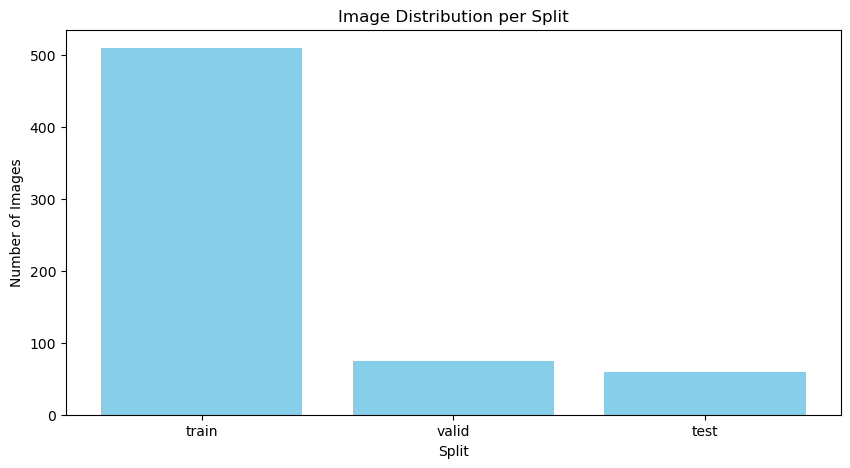

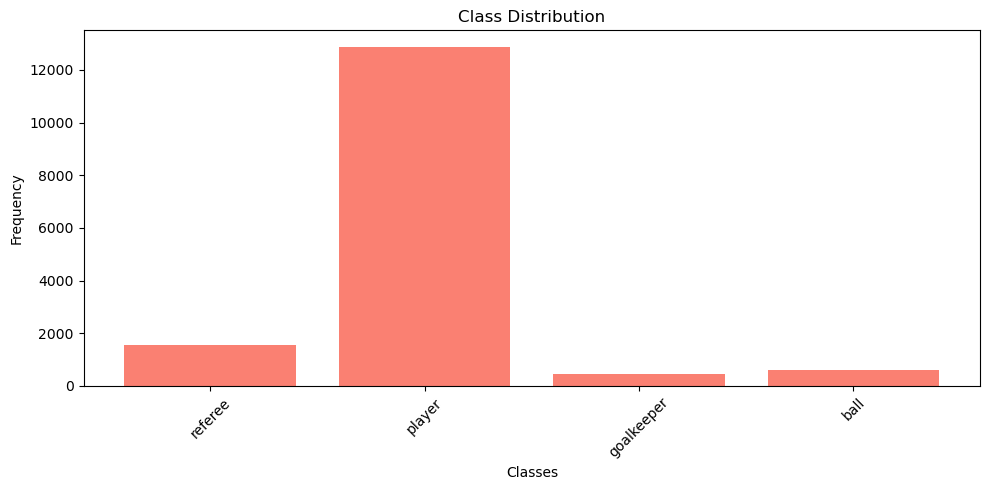

In [3]:
# plot dataset
plot_dataset(dataset_path)

In [ ]:
model.train(data=os.path.join(dataset_path, "data.yaml"), epochs=50, imgsz=640, save=True, project="yolo_football_analysis", name="yolo8L_dataset_v0")

New https://pypi.org/project/ultralytics/8.3.78 available  Update with 'pip install -U ultralytics'
engine\trainer: task=detect, mode=train, model=yolov8l.pt, data=c:\Users\siani\PycharmProjects\AIxFootballAnalysis\src\training\../../dataset\yolov8\v0\data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=yolo_football_analysis, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save

wandb: Currently logged in as: sianiemanuele (sianiemanuele_07) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed 


train: Scanning C:\Users\siani\PycharmProjects\AIxFootballAnalysis\dataset\yolov8\v0\train\labels.cache... 510 images, 0 backgrounds, 0 corrupt: 100%|██████████| 510/510 [00:00<?, ?it/s]Scanning C:\Users\siani\PycharmProjects\AIxFootballAnalysis\dataset\yolov8\v0\train\labels.cache... 510 images, 0 backgrounds, 0 corrupt: 100%|██████████| 510/510 [00:00<?, ?it/s]
val: Scanning C:\Users\siani\PycharmProjects\AIxFootballAnalysis\dataset\yolov8\v0\valid\labels.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]Scanning C:\Users\siani\PycharmProjects\AIxFootballAnalysis\dataset\yolov8\v0\valid\labels.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]


Plotting labels to yolo_football_analysis\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to yolo_football_analysis\train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      10.4G      1.379      1.838     0.8405        613        640: 100%|██████████| 32/32 [08:31<00:00, 15.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.98s/it]


                   all         75       1796      0.245      0.308      0.209      0.125

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      10.1G      1.339     0.9143     0.8262        720        640: 100%|██████████| 32/32 [09:32<00:00, 17.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:17<00:00,  5.88s/it]


                   all         75       1796      0.245      0.308      0.209      0.125

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      10.3G       1.38     0.8181       0.83        532        640: 100%|██████████| 32/32 [08:29<00:00, 15.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:17<00:00,  5.90s/it]


                   all         75       1796      0.238       0.02     0.0202     0.0123

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      10.2G      1.325     0.7318     0.8214        550        640: 100%|██████████| 32/32 [08:04<00:00, 15.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:17<00:00,  5.85s/it]


                   all         75       1796      0.371      0.349      0.149     0.0727

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      10.1G      1.262     0.6651     0.8171        511        640: 100%|██████████| 32/32 [08:02<00:00, 15.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<00:00,  5.51s/it]


                   all         75       1796      0.801      0.578      0.613      0.381

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      10.2G      1.245     0.6275     0.8153        520        640: 100%|██████████| 32/32 [08:33<00:00, 16.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:17<00:00,  5.89s/it]


                   all         75       1796      0.716       0.59      0.622      0.382

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      10.2G      1.281     0.6346     0.8197        586        640: 100%|██████████| 32/32 [07:48<00:00, 14.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<00:00,  5.53s/it]


                   all         75       1796      0.798      0.589      0.646      0.383

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      10.2G      1.327     0.6804     0.8189        459        640: 100%|██████████| 32/32 [07:37<00:00, 14.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<00:00,  5.43s/it]


                   all         75       1796      0.877      0.607      0.678      0.417

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      10.2G      1.203     0.6086      0.812        543        640: 100%|██████████| 32/32 [08:04<00:00, 15.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<00:00,  5.25s/it]


                   all         75       1796      0.846      0.641      0.705      0.445

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      10.2G      1.161     0.5833     0.8088        652        640: 100%|██████████| 32/32 [08:39<00:00, 16.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<00:00,  5.32s/it]


                   all         75       1796       0.86      0.626      0.693      0.421

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      10.1G      1.134     0.5562     0.8071        671        640: 100%|██████████| 32/32 [09:02<00:00, 16.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<00:00,  5.57s/it]


                   all         75       1796       0.86      0.649      0.701      0.437

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      10.2G      1.154     0.5703     0.8086        689        640: 100%|██████████| 32/32 [08:43<00:00, 16.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<00:00,  5.61s/it]


                   all         75       1796      0.844      0.629      0.692      0.387

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      10.1G      1.147     0.5637      0.806        548        640: 100%|██████████| 32/32 [08:59<00:00, 16.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:17<00:00,  5.68s/it]


                   all         75       1796      0.867      0.688      0.742      0.452

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      10.2G        1.1     0.5357     0.8025        552        640: 100%|██████████| 32/32 [08:20<00:00, 15.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<00:00,  5.58s/it]


                   all         75       1796       0.94      0.674      0.734      0.468

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      10.1G      1.139     0.5435     0.8034        471        640: 100%|██████████| 32/32 [08:08<00:00, 15.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<00:00,  5.61s/it]


                   all         75       1796      0.869      0.671      0.729      0.452

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      10.2G      1.101     0.5306     0.8039        702        640: 100%|██████████| 32/32 [09:09<00:00, 17.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<00:00,  5.57s/it]


                   all         75       1796      0.813      0.713      0.748       0.46

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      10.2G      1.072     0.5149     0.8001        490        640: 100%|██████████| 32/32 [08:14<00:00, 15.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<00:00,  5.11s/it]


                   all         75       1796      0.839        0.7      0.748      0.468

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      10.2G      1.057     0.5011     0.8004        751        640: 100%|██████████| 32/32 [08:10<00:00, 15.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<00:00,  5.09s/it]


                   all         75       1796      0.811      0.694      0.729       0.46

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      10.1G      1.061     0.5061     0.7986        578        640: 100%|██████████| 32/32 [08:20<00:00, 15.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<00:00,  5.56s/it]


                   all         75       1796       0.79      0.658      0.706      0.425

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      10.1G      1.044     0.4993     0.7974        580        640: 100%|██████████| 32/32 [07:34<00:00, 14.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<00:00,  5.29s/it]


                   all         75       1796      0.913      0.678      0.757      0.478

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      10.1G      1.053     0.4958     0.7982        690        640: 100%|██████████| 32/32 [07:36<00:00, 14.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<00:00,  5.35s/it]


                   all         75       1796      0.865      0.717      0.756      0.468

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      10.2G      1.105     0.5213     0.7995        610        640: 100%|██████████| 32/32 [07:28<00:00, 14.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<00:00,  5.47s/it]


                   all         75       1796      0.889      0.699      0.758      0.476

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      10.3G      1.017     0.4838     0.7956        465        640: 100%|██████████| 32/32 [07:45<00:00, 14.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<00:00,  5.38s/it]


                   all         75       1796      0.862      0.724      0.778      0.508

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      10.2G      1.021     0.4796     0.7942        694        640: 100%|██████████| 32/32 [07:31<00:00, 14.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<00:00,  5.54s/it]


                   all         75       1796      0.904      0.686      0.747      0.471

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      10.1G     0.9932     0.4695     0.7971        530        640: 100%|██████████| 32/32 [07:53<00:00, 14.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<00:00,  5.17s/it]


                   all         75       1796      0.862      0.714      0.758      0.492

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      10.1G      1.015     0.4721     0.7959        447        640: 100%|██████████| 32/32 [08:03<00:00, 15.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<00:00,  5.23s/it]


                   all         75       1796      0.952      0.708      0.767      0.504

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      10.3G     0.9856     0.4616     0.7948        503        640: 100%|██████████| 32/32 [07:44<00:00, 14.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<00:00,  5.18s/it]


                   all         75       1796      0.928      0.722      0.779      0.505

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      10.2G      0.994     0.4618     0.7944        527        640: 100%|██████████| 32/32 [06:57<00:00, 13.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.95s/it]


                   all         75       1796       0.92      0.715      0.782      0.498

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      10.2G     0.9788     0.4535     0.7934        520        640: 100%|██████████| 32/32 [08:07<00:00, 15.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<00:00,  4.64s/it]


                   all         75       1796      0.878      0.744      0.788      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      10.1G     0.9899     0.4569     0.7941        494        640: 100%|██████████| 32/32 [07:43<00:00, 14.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<00:00,  5.05s/it]


                   all         75       1796      0.873      0.701      0.764      0.487

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      10.2G     0.9881     0.4569     0.7952        545        640: 100%|██████████| 32/32 [08:32<00:00, 16.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.86s/it]


                   all         75       1796      0.857      0.745      0.788        0.5

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      10.2G     0.9602     0.4449     0.7914        681        640: 100%|██████████| 32/32 [07:38<00:00, 14.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<00:00,  5.24s/it]


                   all         75       1796      0.877      0.718      0.767      0.503

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      10.2G     0.9774     0.4485     0.7921        539        640: 100%|██████████| 32/32 [06:14<00:00, 11.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<00:00,  5.41s/it]


                   all         75       1796      0.938      0.704       0.79      0.527

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      10.2G     0.9761     0.4488     0.7909        589        640: 100%|██████████| 32/32 [06:10<00:00, 11.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<00:00,  5.44s/it]


                   all         75       1796      0.911      0.729      0.779      0.512

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      10.2G      0.953      0.434     0.7899        490        640: 100%|██████████| 32/32 [07:19<00:00, 13.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<00:00,  5.23s/it]


                   all         75       1796      0.866      0.733       0.79      0.508

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      10.2G     0.9474     0.4342     0.7919        587        640: 100%|██████████| 32/32 [07:14<00:00, 13.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.91s/it]


                   all         75       1796      0.941       0.72      0.787      0.526

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      10.2G     0.9374     0.4281     0.7913        523        640: 100%|██████████| 32/32 [07:13<00:00, 13.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<00:00,  5.51s/it]


                   all         75       1796      0.912      0.728      0.796      0.514

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      10.1G     0.9165     0.4197     0.7909        606        640: 100%|██████████| 32/32 [07:13<00:00, 13.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<00:00,  5.67s/it]


                   all         75       1796      0.917      0.729      0.797      0.533

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      10.2G     0.9247     0.4188     0.7919        502        640: 100%|██████████| 32/32 [07:29<00:00, 14.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<00:00,  5.09s/it]


                   all         75       1796      0.915      0.721      0.795      0.518

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      10.2G      0.944     0.4253     0.7904        640        640: 100%|██████████| 32/32 [06:53<00:00, 12.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<00:00,  5.35s/it]


                   all         75       1796      0.902      0.724        0.8      0.532
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      10.1G      0.914     0.4193     0.7924        325        640: 100%|██████████| 32/32 [06:22<00:00, 11.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<00:00,  4.59s/it]


                   all         75       1796      0.866      0.742      0.801      0.536

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      10.1G     0.8732      0.409      0.789        313        640: 100%|██████████| 32/32 [07:12<00:00, 13.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<00:00,  5.09s/it]


                   all         75       1796      0.913      0.725      0.783      0.521

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      10.1G     0.8579      0.398     0.7926        329        640: 100%|██████████| 32/32 [07:59<00:00, 14.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<00:00,  5.14s/it]


                   all         75       1796      0.841       0.71      0.768      0.509

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      10.2G     0.8688     0.4008     0.7911        318        640: 100%|██████████| 32/32 [06:41<00:00, 12.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.86s/it]


                   all         75       1796      0.905      0.733      0.802      0.533

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50        10G     0.8371     0.3869     0.7859        326        640: 100%|██████████| 32/32 [08:30<00:00, 15.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<00:00,  4.52s/it]


                   all         75       1796      0.942      0.725      0.796      0.522

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      10.1G     0.8363      0.385     0.7904        327        640: 100%|██████████| 32/32 [07:49<00:00, 14.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.88s/it]


                   all         75       1796      0.921      0.743      0.803      0.532

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      10.2G     0.8365     0.3898     0.7865        332        640: 100%|██████████| 32/32 [07:53<00:00, 14.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.68s/it]


                   all         75       1796        0.9      0.737      0.789       0.52

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      10.1G     0.8323     0.3804     0.7857        332        640: 100%|██████████| 32/32 [07:35<00:00, 14.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<00:00,  4.53s/it]


                   all         75       1796      0.899      0.743      0.799      0.529

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50        10G     0.8339     0.3811      0.789        320        640: 100%|██████████| 32/32 [07:03<00:00, 13.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.75s/it]


                   all         75       1796      0.891      0.735      0.803      0.537

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      10.1G      0.809     0.3697     0.7877        321        640: 100%|██████████| 32/32 [07:46<00:00, 14.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<00:00,  4.55s/it]


                   all         75       1796      0.895       0.74      0.808      0.545

50 epochs completed in 6.793 hours.
Optimizer stripped from yolo_football_analysis\train\weights\last.pt, 87.6MB
Optimizer stripped from yolo_football_analysis\train\weights\best.pt, 87.6MB

Validating yolo_football_analysis\train\weights\best.pt...
Ultralytics 8.3.28  Python-3.10.0 torch-2.5.0 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
Model summary (fused): 268 layers, 43,609,692 parameters, 0 gradients, 164.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.59it/s]


                   all         75       1796      0.895       0.74      0.808      0.544
                  ball         73         73      0.849      0.231      0.375      0.134
            goalkeeper         50         50      0.849       0.82      0.888      0.613
                player         75       1493       0.95       0.97       0.99       0.75
               referee         75        180       0.93      0.939       0.98      0.678
Speed: 0.8ms preprocess, 10.0ms inference, 0.0ms loss, 5.2ms postprocess per image
Results saved to yolo_football_analysis\train


lr/pg0,▃▆████▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁
lr/pg1,▃▆████▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁
lr/pg2,▃▆████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁
metrics/mAP50(B),▃▃▁▂▆▇▇▇▇▇▇▇▇▇▇█████████████████████████
metrics/mAP50-95(B),▂▂▁▂▆▆▆▇▆▇▇▇▇▇▇▇▇▇█▇▇▇▇▇▇▇██████████████
metrics/precision(B),▁▁▁▇▆▇▇▇▇▇█▇▇▇▇█▇▇▇████▇▇██▇████▇█▇██▇▇▇
metrics/recall(B),▄▁▄▆▆▇▇▇▇▇▇▇███▇███▇████████████████████
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,▇█▇▇▆▇▆▅▅▅▅▅▄▄▄▄▅▄▄▃▃▃▃▃▃▃▃▃▃▃▂▃▂▂▂▁▁▁▁▁


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000026AE607A920>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
       

In [ ]:
wandb.finish()

Ultralytics 8.3.28  Python-3.10.0 torch-2.5.0 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
Model summary (fused): 268 layers, 43,609,692 parameters, 0 gradients, 164.8 GFLOPs


val: Scanning C:\Users\siani\PycharmProjects\AIxFootballAnalysis\dataset\yolov8\v0\valid\labels.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]Scanning C:\Users\siani\PycharmProjects\AIxFootballAnalysis\dataset\yolov8\v0\valid\labels.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.08it/s]


                   all         75       1796      0.883      0.738      0.802      0.552
                  ball         73         73      0.799      0.218      0.348      0.134
            goalkeeper         50         50      0.849       0.82      0.889      0.639
                player         75       1493       0.95      0.971       0.99      0.758
               referee         75        180      0.936      0.944      0.982      0.679
Speed: 1.0ms preprocess, 15.1ms inference, 0.0ms loss, 4.9ms postprocess per image
Results saved to yolo_football_analysis\train2


### Plots

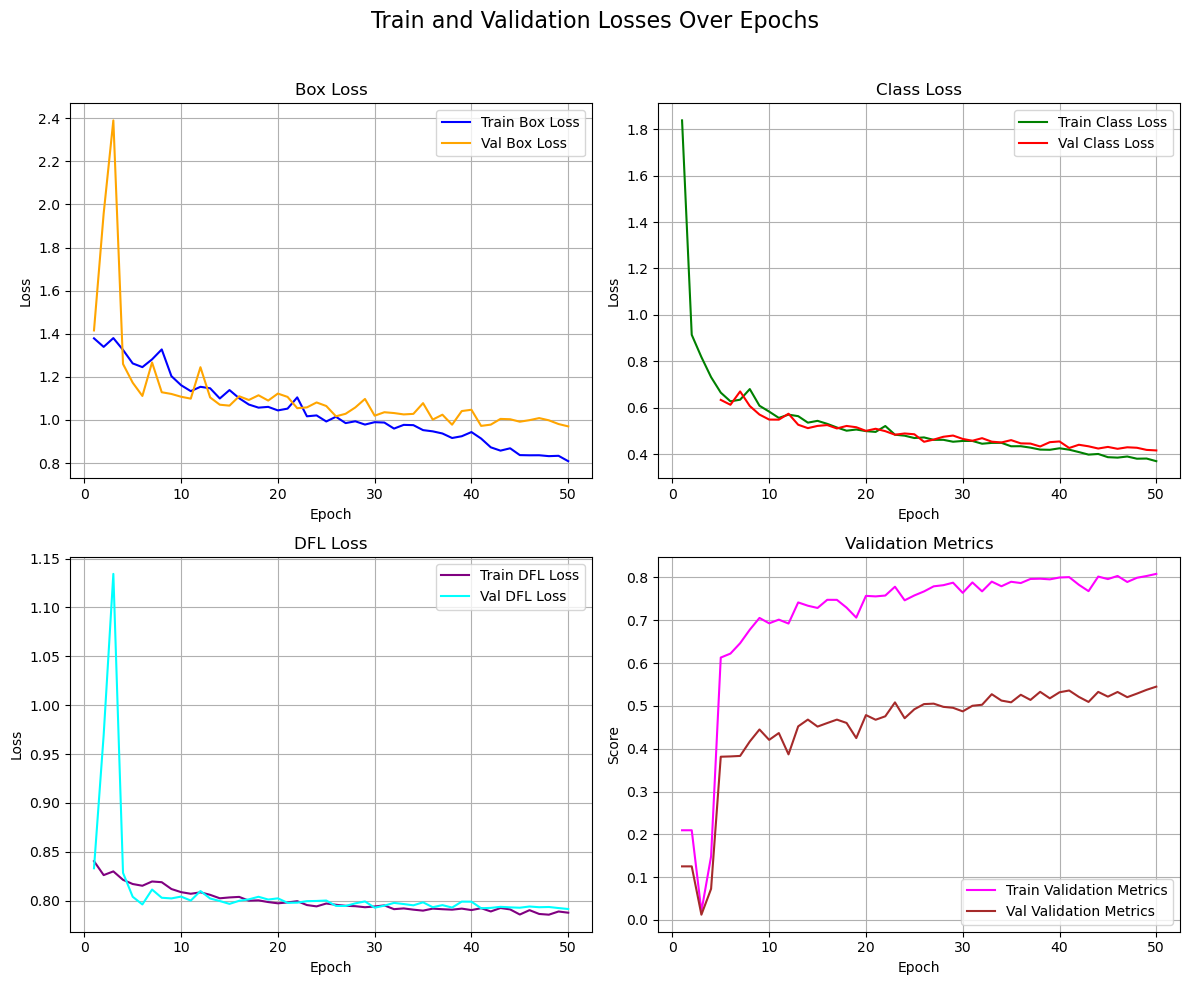

In [18]:
results_path = os.path.join(cwd, "yolo_football_analysis", "yolo8L_dataset_v0", "results.csv")
data = pd.read_csv(results_path)
plot_losses(data)

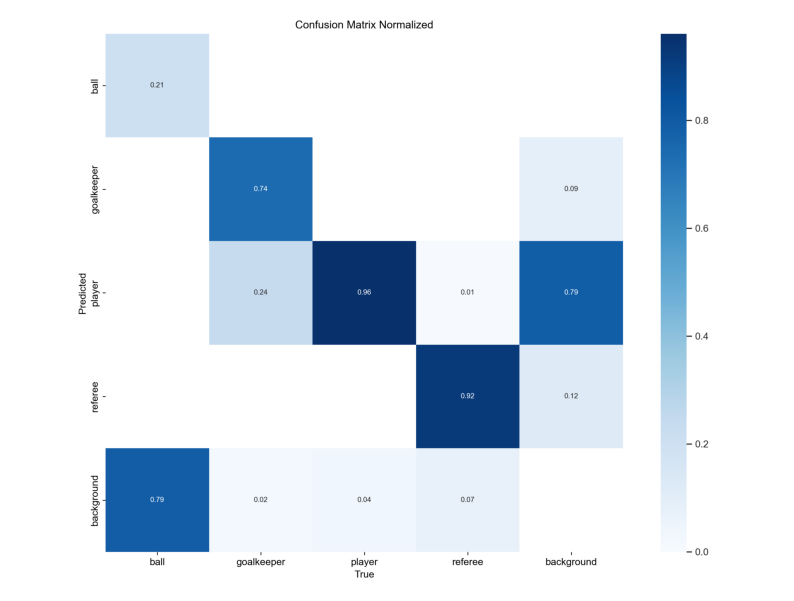

In [19]:
# load and show confusion matrix
matrix_path = os.path.join(cwd, "yolo_football_analysis", "yolo8L_dataset_v0", "confusion_matrix_normalized.png")
plot_confusion_matrix(matrix_path)


## YOLO v5Lu

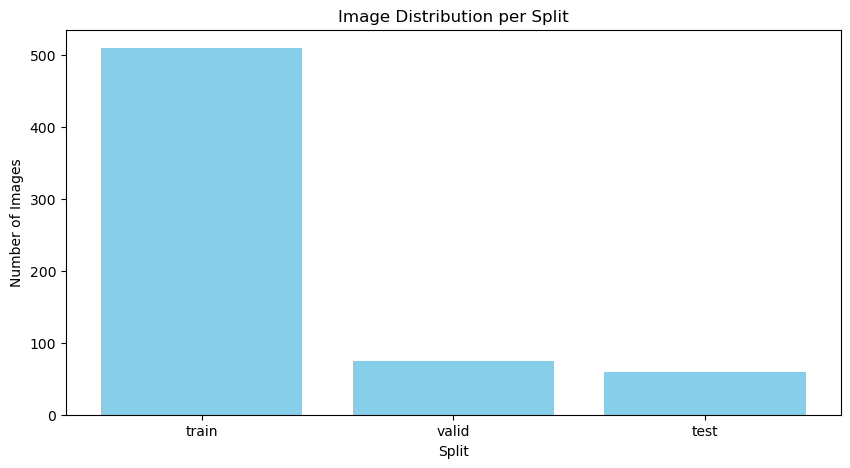

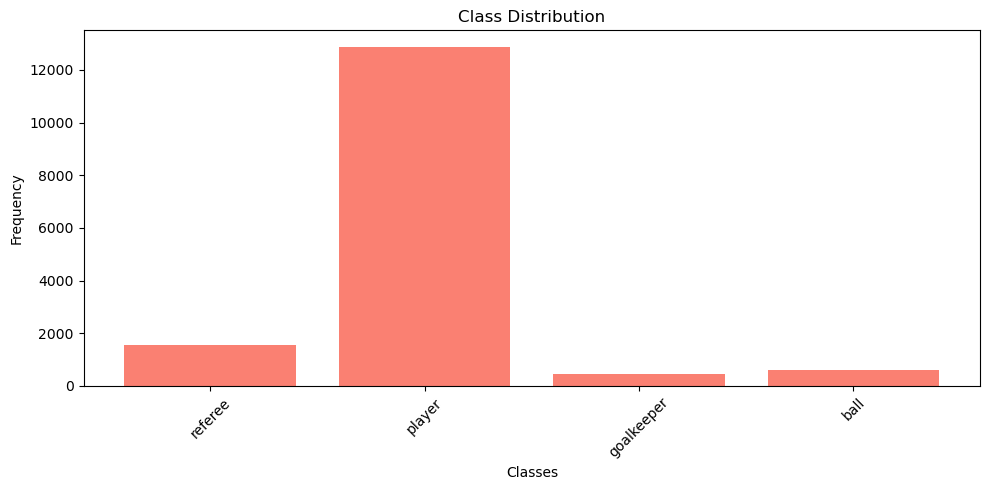

In [5]:
#train yolo on GPU with 10 epochs
mp.freeze_support()  # Necessario su Windows
model = YOLO("yolov5lu.pt")
model = model.cuda()
# print current path
dataset_path = os.path.join(dataset_root_folder, "yolov5", "v0")
# plot dataset
plot_dataset(dataset_path)

In [6]:
model.train(data=os.path.join(dataset_path, "data.yaml"), epochs=50, imgsz=640, save=True, project="yolo_football_analysis", name="yolo5L_dataset_v0")
model.val(data=os.path.join(dataset_path, "data.yaml"), epochs=20, imgsz=640, save=True, save_dir="yolov5", project="yolo_football_analysis")
wandb.finish()

New https://pypi.org/project/ultralytics/8.3.78 available  Update with 'pip install -U ultralytics'
engine\trainer: task=detect, mode=train, model=yolov5lu.pt, data=c:\Users\siani\PycharmProjects\AIxFootballAnalysis\src\training\../../dataset\yolov5\v0\data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=yolo_football_analysis, name=yolo5L_dataset_v0, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, sho

wandb: Currently logged in as: sianiemanuele (sianiemanuele_07) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Freezing layer 'model.24.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed 


train: Scanning C:\Users\siani\PycharmProjects\AIxFootballAnalysis\dataset\yolov5\v0\train\labels...:   0%|          | 0/510 [00:00<?, ?it/s]Scanning C:\Users\siani\PycharmProjects\AIxFootballAnalysis\dataset\yolov5\v0\train\labels... 57 images, 0 backgrounds, 0 corrupt:  11%|█         | 57/510 [00:00<00:00, 566.28it/s]Scanning C:\Users\siani\PycharmProjects\AIxFootballAnalysis\dataset\yolov5\v0\train\labels... 130 images, 0 backgrounds, 0 corrupt:  25%|██▌       | 130/510 [00:00<00:00, 624.54it/s]Scanning C:\Users\siani\PycharmProjects\AIxFootballAnalysis\dataset\yolov5\v0\train\labels... 210 images, 0 backgrounds, 0 corrupt:  41%|████      | 210/510 [00:00<00:00, 686.08it/s]Scanning C:\Users\siani\PycharmProjects\AIxFootballAnalysis\dataset\yolov5\v0\train\labels... 279 images, 0 backgrounds, 0 corrupt:  55%|█████▍    | 279/510 [00:00<00:00, 681.22it/s]Scanning C:\Users\siani\PycharmProjects\AIxFootballAnalysis\dataset\yolov5\v0\train\labels... 351 images, 0 backgrounds, 0 corrupt:  

train: New cache created: C:\Users\siani\PycharmProjects\AIxFootballAnalysis\dataset\yolov5\v0\train\labels.cache


val: Scanning C:\Users\siani\PycharmProjects\AIxFootballAnalysis\dataset\yolov5\v0\valid\labels...:   0%|          | 0/75 [00:00<?, ?it/s]Scanning C:\Users\siani\PycharmProjects\AIxFootballAnalysis\dataset\yolov5\v0\valid\labels... 33 images, 0 backgrounds, 0 corrupt:  44%|████▍     | 33/75 [00:00<00:00, 325.17it/s]Scanning C:\Users\siani\PycharmProjects\AIxFootballAnalysis\dataset\yolov5\v0\valid\labels... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<00:00, 428.79it/s]


val: New cache created: C:\Users\siani\PycharmProjects\AIxFootballAnalysis\dataset\yolov5\v0\valid\labels.cache
Plotting labels to yolo_football_analysis\yolo5L_dataset_v0\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.0005), 119 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to yolo_football_analysis\yolo5L_dataset_v0
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50        11G      1.337      1.649     0.8379        613        640: 100%|██████████| 32/32 [07:35<00:00, 14.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:11<00:00,  3.89s/it]


                   all         75       1796      0.494      0.305      0.259       0.12

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      10.6G      1.303     0.8391     0.8233        720        640: 100%|██████████| 32/32 [06:29<00:00, 12.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.94s/it]


                   all         75       1796      0.773      0.544       0.59      0.341

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      10.6G       1.38     0.7907     0.8301        532        640: 100%|██████████| 32/32 [06:00<00:00, 11.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<00:00,  5.16s/it]


                   all         75       1796      0.746      0.472      0.534      0.273

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      10.7G      1.319     0.6935      0.822        550        640: 100%|██████████| 32/32 [05:56<00:00, 11.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<00:00,  4.61s/it]


                   all         75       1796       0.81       0.59       0.66      0.388

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      10.6G      1.257     0.6728       0.82        511        640: 100%|██████████| 32/32 [05:41<00:00, 10.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<00:00,  4.43s/it]


                   all         75       1796      0.786      0.616      0.679      0.392

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      10.7G      1.186     0.6327     0.8151        520        640: 100%|██████████| 32/32 [05:49<00:00, 10.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<00:00,  4.66s/it]


                   all         75       1796      0.779      0.685      0.707      0.415

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      10.7G      1.165     0.5994      0.814        586        640: 100%|██████████| 32/32 [05:35<00:00, 10.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<00:00,  4.61s/it]


                   all         75       1796      0.891      0.641      0.719      0.443

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      10.7G      1.154     0.5775     0.8087        459        640: 100%|██████████| 32/32 [05:42<00:00, 10.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<00:00,  4.37s/it]


                   all         75       1796      0.925      0.627      0.715      0.421

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      10.7G      1.214     0.6084     0.8131        543        640: 100%|██████████| 32/32 [05:12<00:00,  9.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<00:00,  4.51s/it]


                   all         75       1796        0.9        0.6      0.692      0.414

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      10.7G      1.153     0.5762      0.811        652        640: 100%|██████████| 32/32 [05:31<00:00, 10.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<00:00,  4.61s/it]


                   all         75       1796      0.884      0.643      0.718      0.416

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      10.6G      1.087      0.556     0.8047        671        640: 100%|██████████| 32/32 [06:05<00:00, 11.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:12<00:00,  4.16s/it]


                   all         75       1796       0.73      0.568      0.597      0.312

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      10.7G      1.138     0.5639     0.8092        689        640: 100%|██████████| 32/32 [05:28<00:00, 10.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<00:00,  4.58s/it]


                   all         75       1796      0.816      0.657      0.745      0.448

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      10.7G      1.135     0.5481     0.8069        548        640: 100%|██████████| 32/32 [05:49<00:00, 10.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.81s/it]


                   all         75       1796       0.89        0.7      0.767      0.473

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      10.7G       1.08     0.5195      0.804        552        640: 100%|██████████| 32/32 [06:48<00:00, 12.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.69s/it]


                   all         75       1796      0.862      0.683      0.745       0.47

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      10.7G      1.098     0.5395     0.8044        471        640: 100%|██████████| 32/32 [05:53<00:00, 11.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<00:00,  4.36s/it]


                   all         75       1796      0.919      0.668      0.745      0.469

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      10.7G      1.076      0.537     0.8052        702        640: 100%|██████████| 32/32 [05:46<00:00, 10.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<00:00,  4.54s/it]


                   all         75       1796       0.81      0.697      0.739      0.438

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      10.7G      1.062     0.5133     0.8024        490        640: 100%|██████████| 32/32 [05:37<00:00, 10.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<00:00,  4.38s/it]


                   all         75       1796      0.834      0.703      0.771      0.489

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      10.7G      1.062      0.506     0.8024        751        640: 100%|██████████| 32/32 [05:37<00:00, 10.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<00:00,  4.36s/it]


                   all         75       1796      0.834      0.724      0.788      0.493

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      10.6G      1.052     0.4972     0.7995        578        640: 100%|██████████| 32/32 [05:41<00:00, 10.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.96s/it]


                   all         75       1796      0.914      0.698       0.76      0.491

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      10.6G      1.029      0.486     0.7998        580        640: 100%|██████████| 32/32 [05:48<00:00, 10.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<00:00,  5.32s/it]


                   all         75       1796      0.859      0.701      0.769      0.492

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      10.7G      1.048     0.4912        0.8        690        640: 100%|██████████| 32/32 [05:49<00:00, 10.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:12<00:00,  4.21s/it]


                   all         75       1796      0.889      0.706      0.757      0.479

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      10.7G      1.022     0.4849     0.7987        610        640: 100%|██████████| 32/32 [05:53<00:00, 11.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<00:00,  4.66s/it]


                   all         75       1796      0.884      0.727      0.777      0.495

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      10.7G      1.011     0.4742     0.7983        465        640: 100%|██████████| 32/32 [05:53<00:00, 11.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<00:00,  4.61s/it]


                   all         75       1796      0.795       0.72      0.774      0.484

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      10.5G      1.038     0.4924     0.7982        694        640: 100%|██████████| 32/32 [05:28<00:00, 10.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.69s/it]


                   all         75       1796      0.814      0.717      0.759      0.466

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      10.6G      1.025     0.4808     0.8013        530        640: 100%|██████████| 32/32 [05:09<00:00,  9.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:12<00:00,  4.22s/it]


                   all         75       1796      0.847      0.747      0.793       0.51

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      10.6G      1.015     0.4734     0.7991        447        640: 100%|██████████| 32/32 [06:29<00:00, 12.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<00:00,  5.14s/it]


                   all         75       1796      0.918       0.71      0.788      0.505

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      10.6G     0.9805     0.4641     0.7971        503        640: 100%|██████████| 32/32 [05:17<00:00,  9.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:12<00:00,  4.28s/it]


                   all         75       1796      0.897      0.746      0.799      0.509

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      10.7G     0.9715      0.459     0.7965        527        640: 100%|██████████| 32/32 [05:25<00:00, 10.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.91s/it]


                   all         75       1796      0.841      0.721      0.774      0.502

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      10.6G     0.9924     0.4645     0.7976        520        640: 100%|██████████| 32/32 [05:27<00:00, 10.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<00:00,  5.12s/it]


                   all         75       1796      0.845      0.716      0.769      0.489

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      10.7G     0.9945     0.4642     0.7987        494        640: 100%|██████████| 32/32 [06:02<00:00, 11.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.73s/it]


                   all         75       1796       0.87      0.691      0.773      0.494

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      10.7G     0.9816     0.4579     0.7979        545        640: 100%|██████████| 32/32 [05:55<00:00, 11.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.76s/it]


                   all         75       1796      0.855      0.735      0.778       0.51

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      10.7G     0.9476     0.4408     0.7932        681        640: 100%|██████████| 32/32 [05:59<00:00, 11.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.69s/it]


                   all         75       1796      0.838      0.728      0.783      0.516

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      10.7G     0.9592     0.4391     0.7925        539        640: 100%|██████████| 32/32 [05:50<00:00, 10.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:12<00:00,  4.25s/it]


                   all         75       1796      0.855      0.742      0.795      0.514

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      10.7G     0.9575     0.4407      0.792        589        640: 100%|██████████| 32/32 [05:44<00:00, 10.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<00:00,  4.39s/it]


                   all         75       1796      0.826      0.743      0.784       0.51

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      10.7G     0.9448     0.4319     0.7912        490        640: 100%|██████████| 32/32 [05:25<00:00, 10.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<00:00,  4.35s/it]


                   all         75       1796      0.875      0.733      0.781      0.515

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      10.6G     0.9267     0.4314     0.7927        587        640: 100%|██████████| 32/32 [05:24<00:00, 10.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<00:00,  4.51s/it]


                   all         75       1796       0.92       0.73      0.801      0.514

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      10.7G     0.9244     0.4241     0.7919        523        640: 100%|██████████| 32/32 [05:23<00:00, 10.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<00:00,  4.49s/it]


                   all         75       1796      0.862      0.738      0.794      0.521

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      10.6G     0.9197     0.4238     0.7927        606        640: 100%|██████████| 32/32 [05:26<00:00, 10.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<00:00,  5.45s/it]


                   all         75       1796      0.871       0.73      0.789      0.526

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      10.7G     0.9233     0.4178     0.7947        502        640: 100%|██████████| 32/32 [05:26<00:00, 10.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<00:00,  4.50s/it]


                   all         75       1796      0.866      0.744      0.786      0.516

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      10.7G     0.9415     0.4257     0.7925        640        640: 100%|██████████| 32/32 [05:25<00:00, 10.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.72s/it]


                   all         75       1796      0.864      0.752      0.796       0.52
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      10.7G     0.8792     0.4115     0.7922        325        640: 100%|██████████| 32/32 [06:08<00:00, 11.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<00:00,  4.48s/it]


                   all         75       1796      0.909      0.705      0.784      0.529

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      10.7G     0.8563     0.4064     0.7895        313        640: 100%|██████████| 32/32 [05:43<00:00, 10.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.68s/it]


                   all         75       1796      0.901      0.724      0.793      0.527

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      10.7G     0.8538     0.3987     0.7926        329        640: 100%|██████████| 32/32 [05:19<00:00,  9.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<00:00,  4.59s/it]


                   all         75       1796       0.88      0.726      0.785       0.51

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      10.7G     0.8635     0.4005     0.7919        318        640: 100%|██████████| 32/32 [06:32<00:00, 12.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<00:00,  4.59s/it]


                   all         75       1796      0.835      0.726      0.777      0.523

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      10.7G     0.8505     0.3939      0.788        326        640: 100%|██████████| 32/32 [05:13<00:00,  9.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.89s/it]


                   all         75       1796       0.88      0.731      0.783      0.512

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      10.7G     0.8356     0.3861     0.7917        327        640: 100%|██████████| 32/32 [05:19<00:00,  9.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.99s/it]


                   all         75       1796      0.874      0.731      0.793      0.529

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      10.7G     0.8355     0.3885     0.7879        332        640: 100%|██████████| 32/32 [06:03<00:00, 11.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<00:00,  4.62s/it]


                   all         75       1796      0.851       0.74       0.79      0.538

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      10.7G     0.8308      0.379     0.7866        332        640: 100%|██████████| 32/32 [06:12<00:00, 11.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.77s/it]


                   all         75       1796      0.846      0.735      0.786      0.529

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      10.7G     0.8331     0.3799     0.7905        320        640: 100%|██████████| 32/32 [05:20<00:00, 10.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.69s/it]


                   all         75       1796      0.839      0.756      0.793      0.535

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      10.7G     0.8089     0.3719     0.7885        321        640: 100%|██████████| 32/32 [07:01<00:00, 13.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.70s/it]


                   all         75       1796      0.841       0.75      0.792      0.544

50 epochs completed in 5.074 hours.
Optimizer stripped from yolo_football_analysis\yolo5L_dataset_v0\weights\last.pt, 106.8MB
Optimizer stripped from yolo_football_analysis\yolo5L_dataset_v0\weights\best.pt, 106.8MB

Validating yolo_football_analysis\yolo5L_dataset_v0\weights\best.pt...
Ultralytics 8.3.28  Python-3.10.0 torch-2.5.0 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
YOLOv5l summary (fused): 303 layers, 53,134,492 parameters, 0 gradients, 134.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.56it/s]


                   all         75       1796      0.841       0.75      0.792      0.543
                  ball         73         73      0.692      0.246      0.319      0.143
            goalkeeper         50         50        0.8       0.84      0.882      0.609
                player         75       1493      0.958      0.957      0.989      0.756
               referee         75        180      0.915      0.956      0.977      0.665
Speed: 0.6ms preprocess, 8.1ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to yolo_football_analysis\yolo5L_dataset_v0


lr/pg0,▃▆████▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg1,▃▆████▇▇▇▇▆▆▆▆▆▆▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg2,▃▆███▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
metrics/mAP50(B),▁▅▅▆▆▇▇▇▇▅▇▇▇███▇██▇████████████████████
metrics/mAP50-95(B),▁▅▄▅▅▆▆▆▄▆▇▇▆▇▇▇▇▇▇▇▇▇▇▇▇█▇███████▇▇████
metrics/precision(B),▁▆▅▆▆▇██▇▅▇▇█▆▇▇▇▇▆▆██▇▇▇▇▆▇█▇▇▇██▇▇▇▇▇▇
metrics/recall(B),▁▅▄▅▆▆▆▆▆▅▇▇▇▇▇▇▇▇█▇█▇██▇████████▇██████
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,▇▇█▇▆▅▅▆▅▄▅▄▅▄▄▄▄▄▄▃▄▄▃▃▃▃▃▃▃▂▂▂▃▂▂▂▁▁▁▁


Ultralytics 8.3.28  Python-3.10.0 torch-2.5.0 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
YOLOv5l summary (fused): 303 layers, 53,134,492 parameters, 0 gradients, 134.7 GFLOPs


val: Scanning C:\Users\siani\PycharmProjects\AIxFootballAnalysis\dataset\yolov5\v0\valid\labels.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]Scanning C:\Users\siani\PycharmProjects\AIxFootballAnalysis\dataset\yolov5\v0\valid\labels.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.92it/s]


                   all         75       1796      0.853      0.754      0.801      0.548
                  ball         73         73      0.728      0.257      0.351      0.147
            goalkeeper         50         50      0.802       0.84      0.883      0.607
                player         75       1493       0.96      0.957      0.989      0.765
               referee         75        180      0.921      0.961      0.982      0.674
Speed: 0.8ms preprocess, 13.9ms inference, 0.0ms loss, 7.4ms postprocess per image
Results saved to yolo_football_analysis\yolo5L_dataset_v02


### Plots

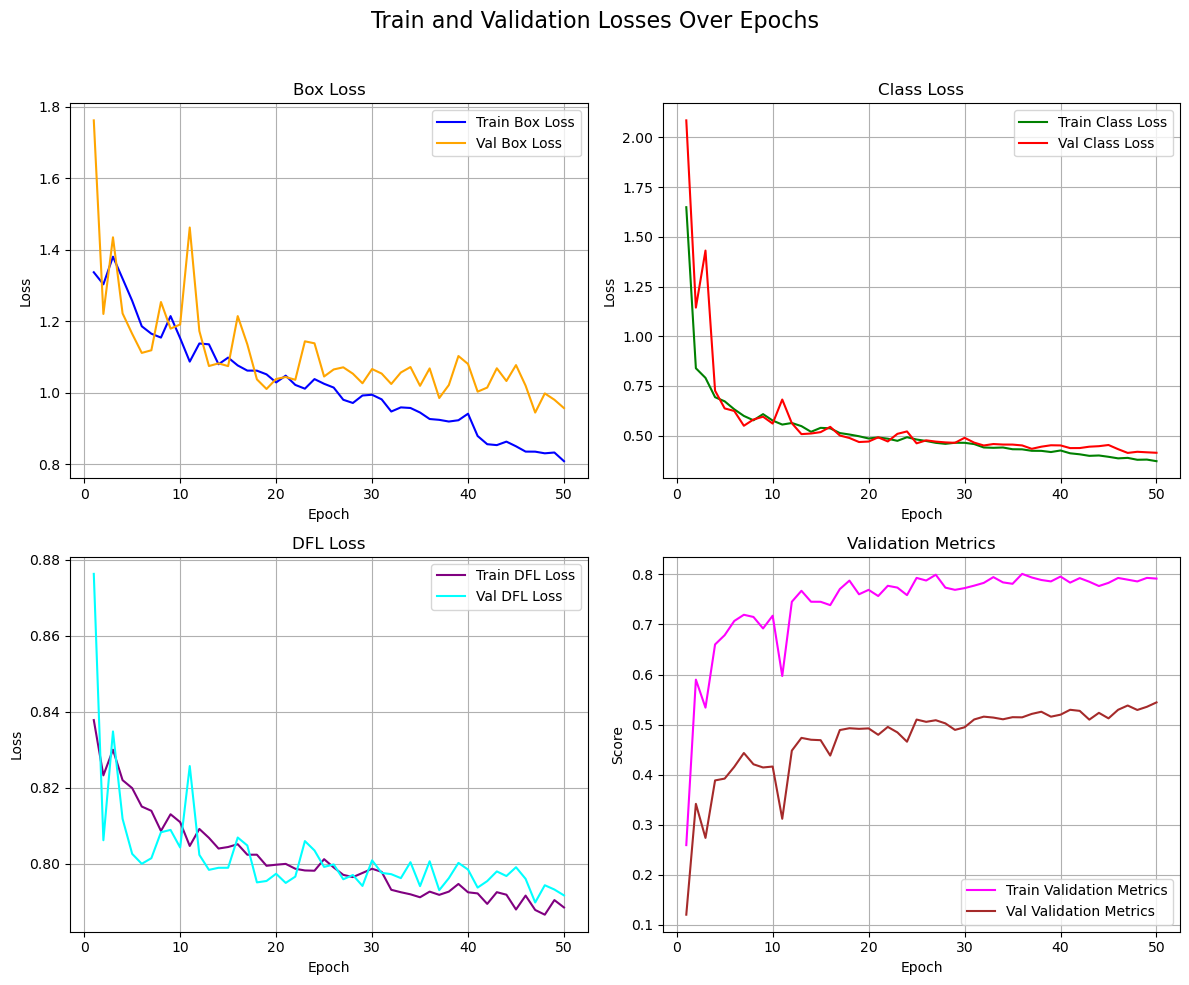

In [20]:
results_path = os.path.join(cwd, "yolo_football_analysis", "yolo5L_dataset_v0", "results.csv")
data = pd.read_csv(results_path)
plot_losses(data)

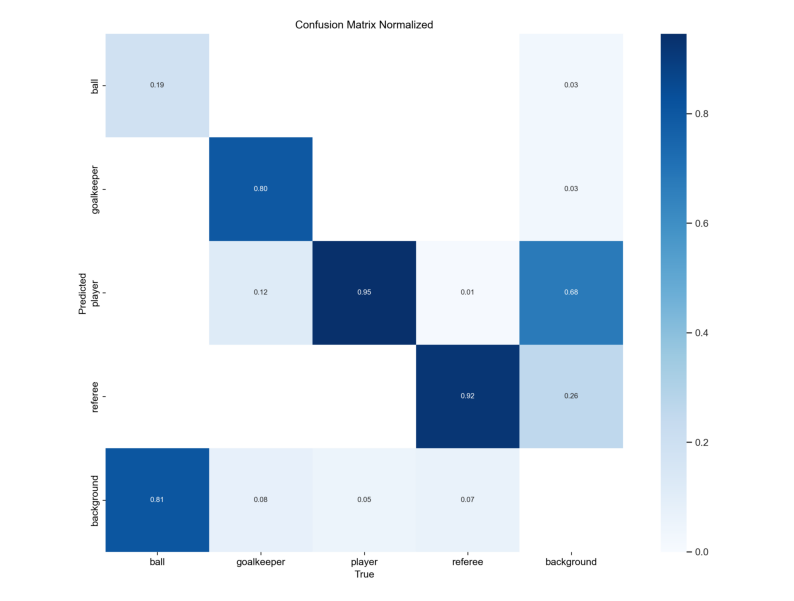

In [23]:
# load and show confusion matrix
matrix_path = os.path.join(cwd,"yolo_football_analysis" ,"yolo5L_dataset_v0", "confusion_matrix_normalized.png")
plot_confusion_matrix(matrix_path)

## YOLO v9c


In [3]:
mp.freeze_support()  # Necessario su Windows
model = YOLO("yolov9c.pt")
model = model.cuda()
dataset_path = os.path.join(dataset_root_folder, "yolov9", "v0")

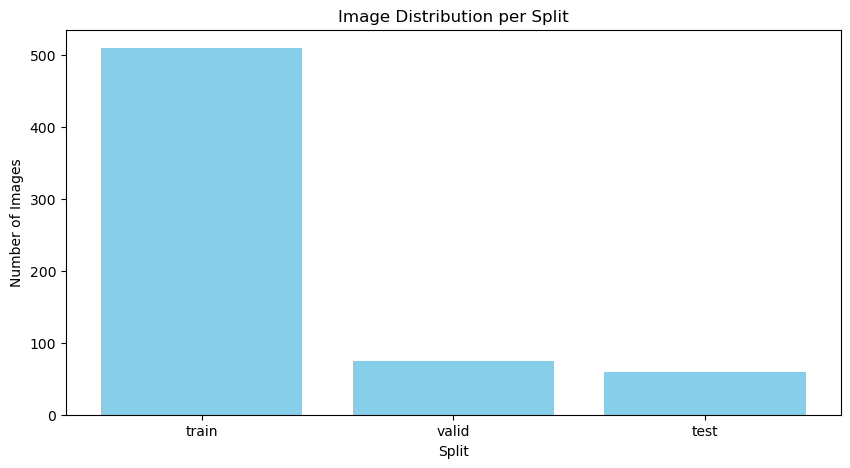

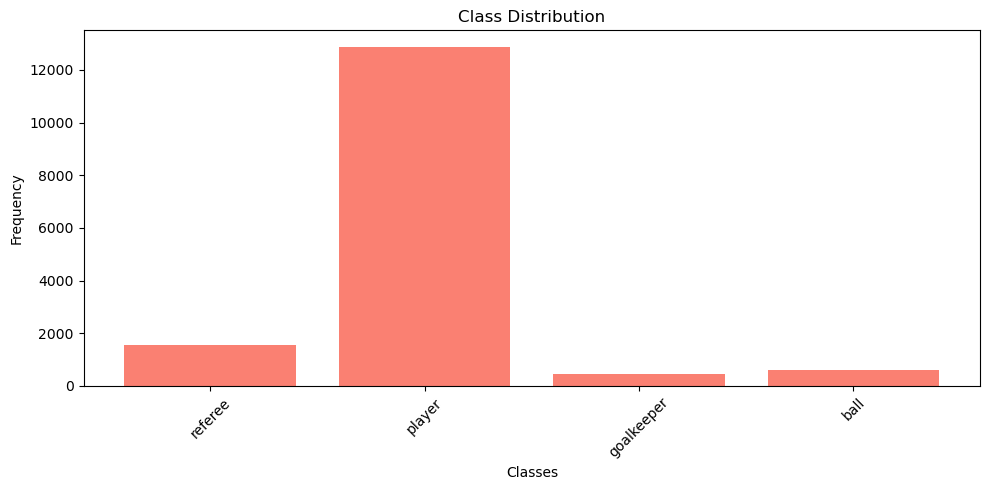

In [4]:
# plot dataset
plot_dataset(dataset_path)

In [5]:
model.train(data=os.path.join(dataset_path, "data.yaml"), epochs=50, imgsz=640, save=True, project="yolo_football_analysis", name="yolo9c_dataset_v0")
wandb.finish()

New https://pypi.org/project/ultralytics/8.3.78 available  Update with 'pip install -U ultralytics'
engine\trainer: task=detect, mode=train, model=yolov9c.pt, data=c:\Users\siani\PycharmProjects\AIxFootballAnalysis\src\training\../../dataset\yolov9\v0\data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=yolo_football_analysis, name=yolo9c_dataset_v0, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show

wandb: Currently logged in as: sianiemanuele (sianiemanuele_07) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed 


train: Scanning C:\Users\siani\PycharmProjects\AIxFootballAnalysis\dataset\yolov9\v0\train\labels...:   0%|          | 0/510 [00:00<?, ?it/s]Scanning C:\Users\siani\PycharmProjects\AIxFootballAnalysis\dataset\yolov9\v0\train\labels... 66 images, 0 backgrounds, 0 corrupt:  13%|█▎        | 66/510 [00:00<00:00, 623.84it/s]Scanning C:\Users\siani\PycharmProjects\AIxFootballAnalysis\dataset\yolov9\v0\train\labels... 133 images, 0 backgrounds, 0 corrupt:  26%|██▌       | 133/510 [00:00<00:00, 618.04it/s]Scanning C:\Users\siani\PycharmProjects\AIxFootballAnalysis\dataset\yolov9\v0\train\labels... 207 images, 0 backgrounds, 0 corrupt:  41%|████      | 207/510 [00:00<00:00, 661.45it/s]Scanning C:\Users\siani\PycharmProjects\AIxFootballAnalysis\dataset\yolov9\v0\train\labels... 274 images, 0 backgrounds, 0 corrupt:  54%|█████▎    | 274/510 [00:00<00:00, 663.08it/s]Scanning C:\Users\siani\PycharmProjects\AIxFootballAnalysis\dataset\yolov9\v0\train\labels... 341 images, 0 backgrounds, 0 corrupt:  

train: New cache created: C:\Users\siani\PycharmProjects\AIxFootballAnalysis\dataset\yolov9\v0\train\labels.cache


val: Scanning C:\Users\siani\PycharmProjects\AIxFootballAnalysis\dataset\yolov9\v0\valid\labels...:   0%|          | 0/75 [00:00<?, ?it/s]Scanning C:\Users\siani\PycharmProjects\AIxFootballAnalysis\dataset\yolov9\v0\valid\labels... 47 images, 0 backgrounds, 0 corrupt:  63%|██████▎   | 47/75 [00:00<00:00, 464.18it/s]Scanning C:\Users\siani\PycharmProjects\AIxFootballAnalysis\dataset\yolov9\v0\valid\labels... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<00:00, 468.11it/s]


val: New cache created: C:\Users\siani\PycharmProjects\AIxFootballAnalysis\dataset\yolov9\v0\valid\labels.cache
Plotting labels to yolo_football_analysis\yolo9c_dataset_v0\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.0005), 160 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to yolo_football_analysis\yolo9c_dataset_v0
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      11.3G      1.384      2.091     0.8414        613        640: 100%|██████████| 32/32 [08:21<00:00, 15.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<00:00,  5.36s/it]


                   all         75       1796      0.416      0.439       0.41      0.243

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      11.2G      1.335     0.8251     0.8243        720        640: 100%|██████████| 32/32 [06:34<00:00, 12.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:17<00:00,  5.67s/it]


                   all         75       1796      0.749      0.511        0.5      0.275

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      11.3G      1.552     0.8703     0.8495        532        640: 100%|██████████| 32/32 [07:13<00:00, 13.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<00:00,  5.61s/it]


                   all         75       1796      0.562      0.356      0.295      0.115

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      11.1G      1.608     0.8335     0.8466        550        640: 100%|██████████| 32/32 [08:18<00:00, 15.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<00:00,  5.49s/it]


                   all         75       1796      0.767      0.614      0.602      0.327

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      11.1G      1.318     0.6923      0.824        511        640: 100%|██████████| 32/32 [08:16<00:00, 15.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<00:00,  5.21s/it]


                   all         75       1796       0.91      0.591      0.691       0.41

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      11.2G       1.26     0.6347     0.8184        520        640: 100%|██████████| 32/32 [08:22<00:00, 15.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<00:00,  5.55s/it]


                   all         75       1796      0.819      0.666      0.692       0.43

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      11.2G      1.219     0.6046      0.818        586        640: 100%|██████████| 32/32 [07:23<00:00, 13.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<00:00,  5.23s/it]


                   all         75       1796      0.803      0.671      0.719      0.442

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      11.2G      1.238     0.5931     0.8146        459        640: 100%|██████████| 32/32 [07:42<00:00, 14.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<00:00,  5.65s/it]


                   all         75       1796      0.817      0.668      0.714      0.435

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      11.2G      1.236     0.5821     0.8146        543        640: 100%|██████████| 32/32 [07:53<00:00, 14.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<00:00,  5.14s/it]


                   all         75       1796      0.867      0.666      0.721      0.436

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      11.2G       1.19     0.5664     0.8118        652        640: 100%|██████████| 32/32 [07:57<00:00, 14.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:17<00:00,  5.82s/it]


                   all         75       1796      0.887      0.626      0.694      0.401

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      11.1G      1.173     0.5522     0.8144        671        640: 100%|██████████| 32/32 [07:22<00:00, 13.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<00:00,  5.29s/it]


                   all         75       1796      0.831       0.63      0.711      0.419

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      11.2G      1.168     0.5575     0.8117        689        640: 100%|██████████| 32/32 [07:12<00:00, 13.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<00:00,  5.40s/it]


                   all         75       1796      0.757      0.578      0.621      0.321

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      11.2G      1.199     0.5542     0.8097        548        640: 100%|██████████| 32/32 [07:21<00:00, 13.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:17<00:00,  5.72s/it]


                   all         75       1796      0.889      0.683      0.746       0.45

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      11.2G      1.143     0.5364     0.8078        552        640: 100%|██████████| 32/32 [06:55<00:00, 12.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<00:00,  5.06s/it]


                   all         75       1796      0.891      0.674      0.735      0.434

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      11.1G      1.103     0.5236     0.8045        471        640: 100%|██████████| 32/32 [07:15<00:00, 13.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.93s/it]


                   all         75       1796       0.86      0.696      0.735      0.459

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      11.2G      1.095      0.513     0.8061        702        640: 100%|██████████| 32/32 [07:09<00:00, 13.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.99s/it]


                   all         75       1796      0.875       0.69       0.75      0.476

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      11.2G      1.035     0.4947      0.801        490        640: 100%|██████████| 32/32 [07:48<00:00, 14.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<00:00,  5.24s/it]


                   all         75       1796       0.86      0.686      0.751      0.478

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      11.2G       1.06     0.5007     0.8031        751        640: 100%|██████████| 32/32 [07:17<00:00, 13.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<00:00,  5.40s/it]


                   all         75       1796      0.692       0.66      0.696      0.437

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      11.1G      1.073     0.5174     0.8004        578        640: 100%|██████████| 32/32 [07:37<00:00, 14.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.95s/it]


                   all         75       1796      0.893      0.676      0.707      0.443

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      11.1G      1.038     0.4899     0.8004        580        640: 100%|██████████| 32/32 [08:12<00:00, 15.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<00:00,  5.33s/it]


                   all         75       1796      0.891      0.715      0.758      0.501

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      11.2G       1.07      0.497     0.8018        690        640: 100%|██████████| 32/32 [07:44<00:00, 14.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<00:00,  5.64s/it]


                   all         75       1796      0.839      0.727      0.774      0.486

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      11.2G      1.046     0.4833        0.8        610        640: 100%|██████████| 32/32 [07:36<00:00, 14.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<00:00,  4.61s/it]


                   all         75       1796      0.862      0.707      0.775      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      11.2G      1.018      0.469     0.7986        465        640: 100%|██████████| 32/32 [08:30<00:00, 15.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<00:00,  5.34s/it]


                   all         75       1796      0.812      0.736      0.784      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      11.2G      1.008     0.4673      0.796        694        640: 100%|██████████| 32/32 [07:44<00:00, 14.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.90s/it]


                   all         75       1796      0.827      0.713      0.759      0.486

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      11.2G     0.9739      0.452     0.7977        530        640: 100%|██████████| 32/32 [07:52<00:00, 14.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.75s/it]


                   all         75       1796       0.84      0.743      0.779      0.502

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      11.1G      1.005     0.4593      0.798        447        640: 100%|██████████| 32/32 [07:46<00:00, 14.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<00:00,  5.08s/it]


                   all         75       1796       0.86      0.725      0.777      0.493

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      11.2G      0.975      0.447     0.7962        503        640: 100%|██████████| 32/32 [08:00<00:00, 15.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<00:00,  5.28s/it]


                   all         75       1796      0.867      0.731      0.785      0.508

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      11.2G      0.963     0.4395     0.7952        527        640: 100%|██████████| 32/32 [07:17<00:00, 13.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<00:00,  5.20s/it]


                   all         75       1796      0.887      0.723      0.781       0.51

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50        11G     0.9851     0.4485     0.7952        520        640: 100%|██████████| 32/32 [07:44<00:00, 14.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<00:00,  4.41s/it]


                   all         75       1796       0.81      0.744      0.781      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      11.2G      1.003     0.4546     0.7983        494        640: 100%|██████████| 32/32 [07:34<00:00, 14.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<00:00,  5.03s/it]


                   all         75       1796      0.816      0.743      0.791      0.512

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      11.2G      1.023     0.4538      0.799        545        640: 100%|██████████| 32/32 [07:11<00:00, 13.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.99s/it]


                   all         75       1796      0.818       0.74       0.78      0.521

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      11.2G      1.011     0.4472     0.7965        681        640: 100%|██████████| 32/32 [07:30<00:00, 14.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<00:00,  5.26s/it]


                   all         75       1796      0.859      0.703      0.769      0.476

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      11.2G      1.009     0.4409     0.7954        539        640: 100%|██████████| 32/32 [07:24<00:00, 13.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<00:00,  5.09s/it]


                   all         75       1796      0.867      0.744      0.785      0.508

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      11.2G     0.9911     0.4353     0.7936        589        640: 100%|██████████| 32/32 [07:24<00:00, 13.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.85s/it]


                   all         75       1796      0.922      0.719      0.768      0.469

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      11.2G     0.9834     0.4308     0.7932        490        640: 100%|██████████| 32/32 [07:43<00:00, 14.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<00:00,  5.52s/it]


                   all         75       1796      0.845      0.729      0.783       0.51

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      11.1G     0.9402     0.4193     0.7935        587        640: 100%|██████████| 32/32 [07:57<00:00, 14.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.97s/it]


                   all         75       1796      0.866       0.74      0.799      0.527

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      11.2G     0.9306     0.4179     0.7932        523        640: 100%|██████████| 32/32 [08:17<00:00, 15.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<00:00,  5.35s/it]


                   all         75       1796      0.916      0.761      0.803       0.53

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      11.1G     0.9078     0.4089     0.7921        606        640: 100%|██████████| 32/32 [07:54<00:00, 14.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<00:00,  5.20s/it]


                   all         75       1796      0.853       0.75      0.803      0.527

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      11.2G     0.9208     0.4142     0.7942        502        640: 100%|██████████| 32/32 [07:56<00:00, 14.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<00:00,  5.27s/it]


                   all         75       1796      0.886       0.73      0.792      0.518

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      11.2G     0.9239     0.4137     0.7922        640        640: 100%|██████████| 32/32 [07:57<00:00, 14.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.98s/it]


                   all         75       1796      0.902      0.755      0.802      0.519
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50        11G     0.8718     0.4032     0.7911        325        640: 100%|██████████| 32/32 [07:37<00:00, 14.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<00:00,  4.63s/it]


                   all         75       1796      0.883      0.751      0.798      0.525

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50        11G     0.8526     0.4024     0.7897        313        640: 100%|██████████| 32/32 [07:26<00:00, 13.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:11<00:00,  3.87s/it]


                   all         75       1796      0.846      0.744      0.797      0.504

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50        11G     0.8623     0.4022     0.7938        329        640: 100%|██████████| 32/32 [07:19<00:00, 13.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<00:00,  4.48s/it]


                   all         75       1796      0.882      0.715       0.78      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      11.2G     0.8681     0.4004     0.7928        318        640: 100%|██████████| 32/32 [07:09<00:00, 13.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:12<00:00,  4.25s/it]


                   all         75       1796      0.882      0.731      0.791      0.513

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50        11G       0.84     0.3867     0.7877        326        640: 100%|██████████| 32/32 [07:24<00:00, 13.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<00:00,  4.34s/it]


                   all         75       1796      0.917      0.754      0.818      0.537

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50        11G     0.8249     0.3773     0.7906        327        640: 100%|██████████| 32/32 [07:20<00:00, 13.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<00:00,  4.38s/it]


                   all         75       1796      0.908      0.749       0.81      0.533

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      11.2G     0.8393      0.382     0.7884        332        640: 100%|██████████| 32/32 [07:02<00:00, 13.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:12<00:00,  4.12s/it]


                   all         75       1796       0.91      0.732      0.803      0.539

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50        11G     0.8287     0.3767     0.7863        332        640: 100%|██████████| 32/32 [07:52<00:00, 14.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:11<00:00,  3.72s/it]


                   all         75       1796      0.919      0.745       0.81      0.535

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50        11G     0.8154     0.3711     0.7891        320        640: 100%|██████████| 32/32 [07:11<00:00, 13.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:12<00:00,  4.24s/it]


                   all         75       1796      0.908      0.746      0.816      0.534

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50        11G     0.8003     0.3629     0.7878        321        640: 100%|██████████| 32/32 [07:21<00:00, 13.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:12<00:00,  4.12s/it]


                   all         75       1796      0.936      0.751      0.823      0.544

50 epochs completed in 6.605 hours.
Optimizer stripped from yolo_football_analysis\yolo9c_dataset_v0\weights\last.pt, 51.6MB
Optimizer stripped from yolo_football_analysis\yolo9c_dataset_v0\weights\best.pt, 51.6MB

Validating yolo_football_analysis\yolo9c_dataset_v0\weights\best.pt...
Ultralytics 8.3.28  Python-3.10.0 torch-2.5.0 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
YOLOv9c summary (fused): 384 layers, 25,322,332 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.09s/it]


                   all         75       1796      0.936      0.751      0.823      0.542
                  ball         73         73      0.952      0.269       0.41      0.132
            goalkeeper         50         50      0.897       0.82      0.912      0.626
                player         75       1493      0.973      0.958       0.99      0.755
               referee         75        180      0.923      0.956      0.979      0.656
Speed: 1.1ms preprocess, 28.0ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to yolo_football_analysis\yolo9c_dataset_v0


lr/pg0,▃▆████▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg1,▃▆████▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg2,▃▆████▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▁▁▁
metrics/mAP50(B),▃▄▁▅▆▇▇▇▆▇▇▇▇▇▇▆▇▇▇▇▇▇█▇▇▇▇█▇███████████
metrics/mAP50-95(B),▃▄▁▄▆▆▆▆▆▄▆▇▇▇▆▇▇▇▇▇▇▇▇▇█▇▇▇█████▇▇█████
metrics/precision(B),▁▅▃▆█▆▆▇▇▆▇▇▇▇▅▇▇▇▇▇▇▇▆▆▆▇█▇▇█▇█▇▇▇█████
metrics/recall(B),▂▄▁▅▅▆▆▆▆▆▇▇▇▇▇▇▇▇█▇▇▇████▇▇██▇███▇██▇██
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,▆▆██▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▃▃▃▂▃▃▃▃▃▃▂▂▂▂▁▂▁▁▁▁


### Plots

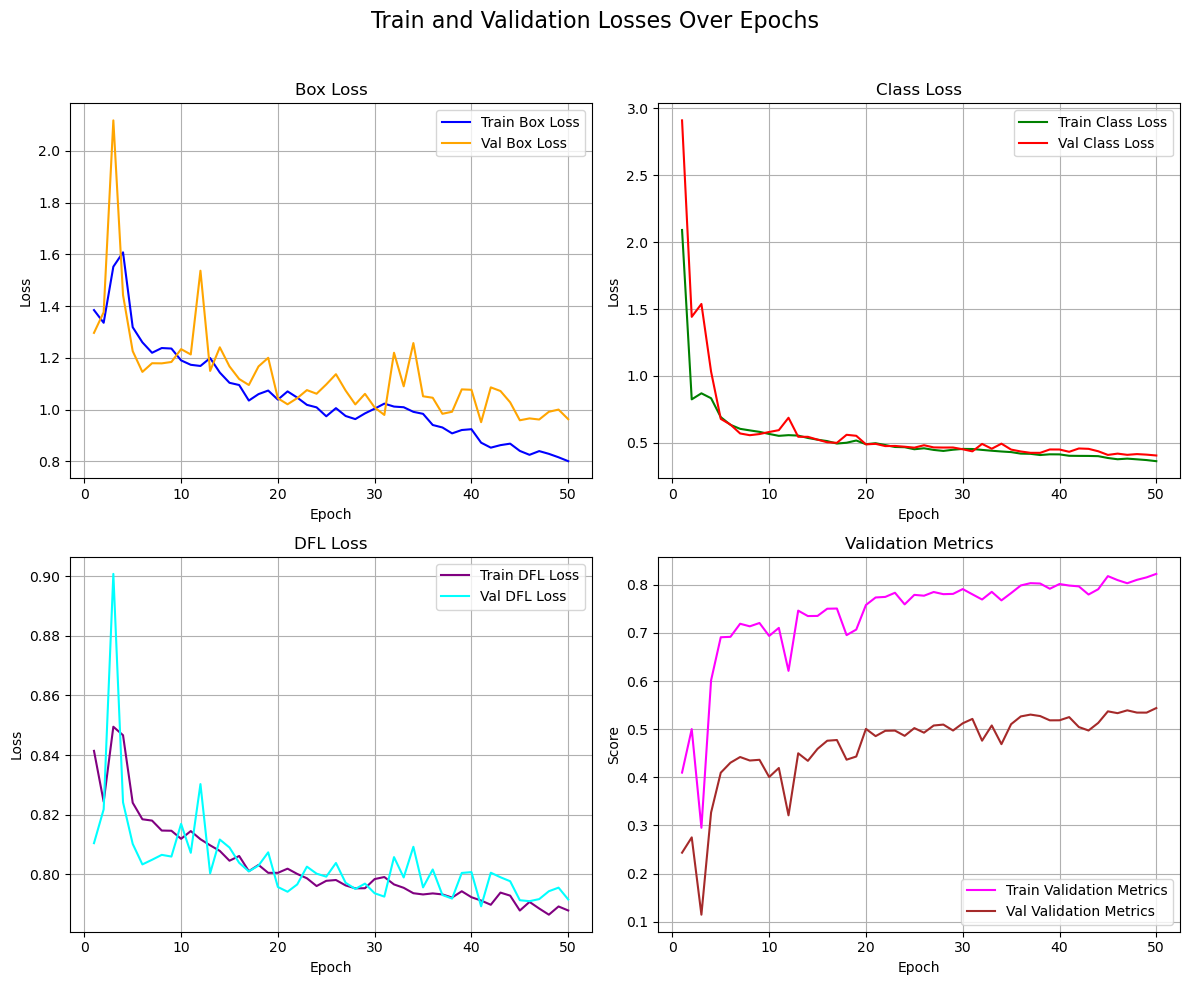

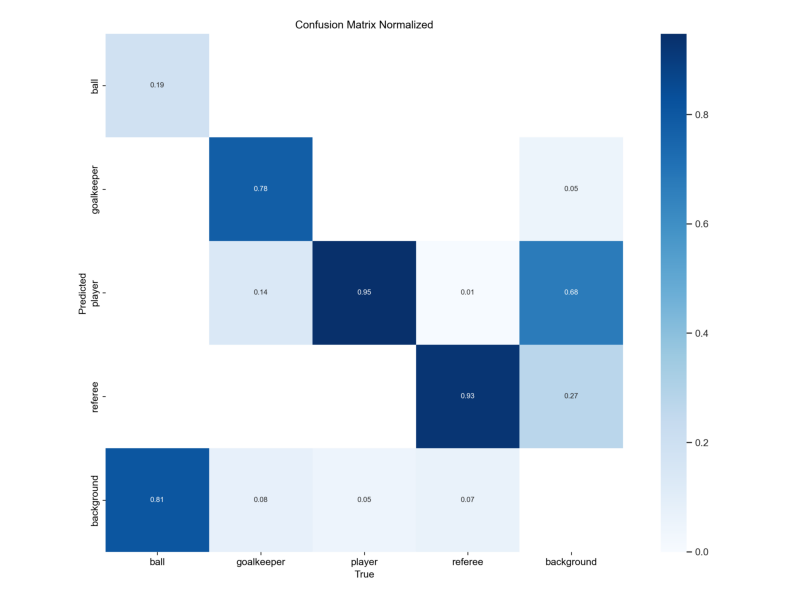

In [6]:
results_path = os.path.join(cwd, "yolo_football_analysis", "yolo9c_dataset_v0", "results.csv")
data = pd.read_csv(results_path)
plot_losses(data)
# load and show confusion matrix
matrix_path = os.path.join(cwd,"yolo_football_analysis" ,"yolo9c_dataset_v0", "confusion_matrix_normalized.png")
plot_confusion_matrix(matrix_path)

# Determining best augmentation method

## Traditional Augmentation


In [ ]:
mp.freeze_support()  # Necessario su Windows
model = YOLO("yolov9c.pt")
model = model.cuda()
dataset_path = os.path.join(dataset_root_folder, "yolov9", "v1")

### plot dataset

In [ ]:
plot_dataset(dataset_path)
model.train(data=os.path.join(dataset_path, "data.yaml"), epochs=50, imgsz=640, save=True, project="yolo_football_analysis", name="yolo9c_dataset_v1")
wandb.finish()

### Plots

In [ ]:
results_path = os.path.join(cwd, "yolo_football_analysis", "yolo9c_dataset_v1", "results.csv")
data = pd.read_csv(results_path)
plot_losses(data)


## BBOX copy-paste augmentation

We augment the dataset by copy pasting balls. Such copy pasting is done at bbox level

In [3]:
import sys
sys.path.append('..')
from utils import bbox_copy_paste
dataset_source_path = os.path.join(dataset_root_folder, "yolov9", "v0")
dataset_target_path = os.path.join(dataset_root_folder, "yolov9", "v2")

bbox_copy_paste(dataset_source_path, dataset_target_path, num_copies=2, overwrite=False)

Extracted 465 ball objects for augmentation.
Dataset processing completed successfully!


### Visualize augmented images

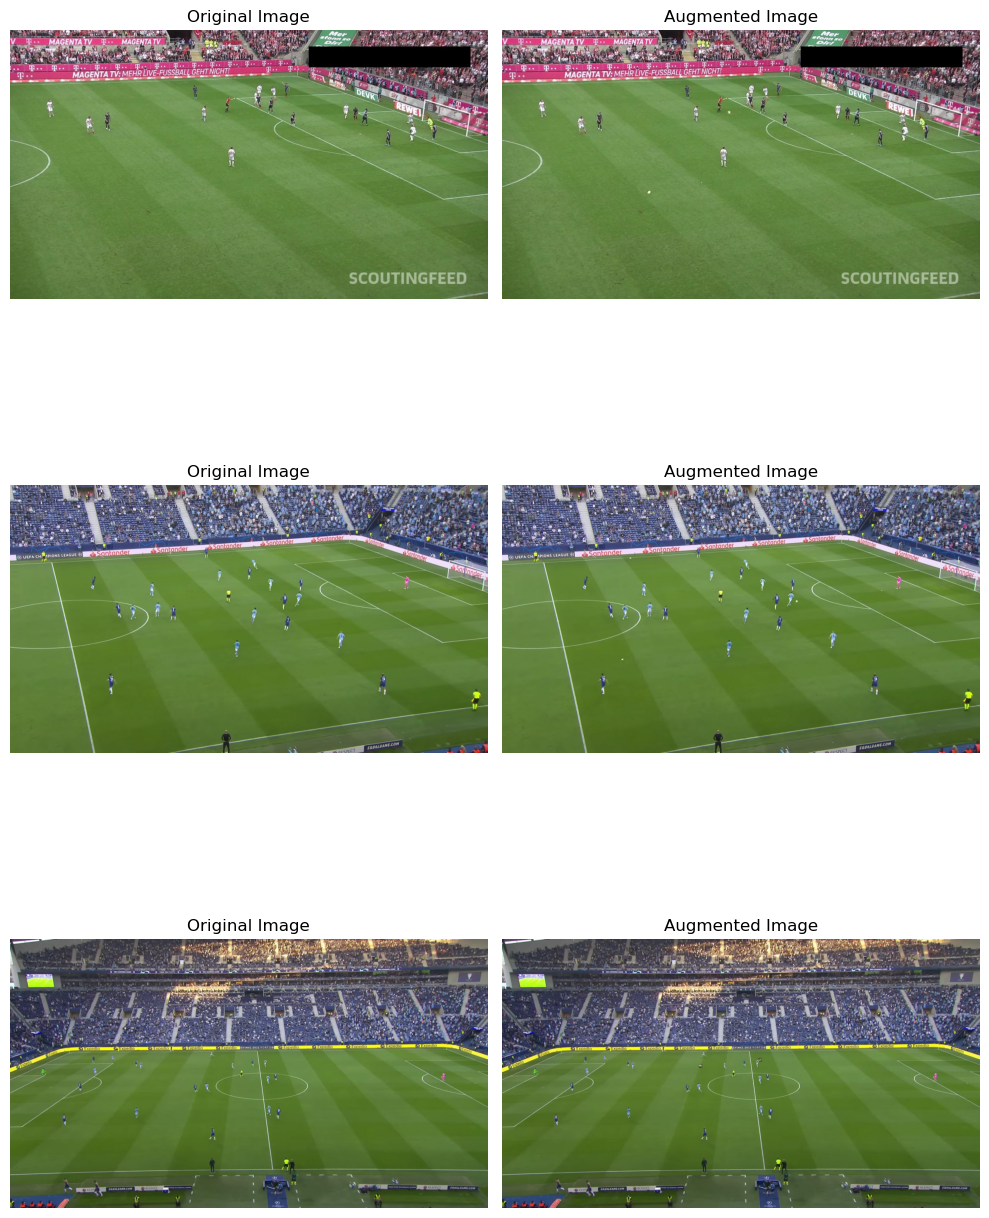

In [11]:
# visualize three random images from dataset. Then their augmented version. Augmented file has the same name but starts with "aug_"

import random
import cv2
import os
import matplotlib.pyplot as plt

def visualize_images(dataset_path, num_images=3):
    """
    Visualizes random images from a dataset and their augmented versions.

    Args:
        dataset_path (str): Path to the dataset.
        num_images (int): Number of images to visualize.
    """

    # Get image paths
    images_dir = os.path.join(dataset_path, "train", "images")
    image_files = os.listdir(images_dir)

    # exlude augmented images
    image_files = [f for f in image_files if not f.startswith("aug_")]

    # Randomly select images
    selected_images = random.sample(image_files, num_images)

    # Plot images
    fig, axes = plt.subplots(num_images, 2, figsize=(10, 5*num_images))

    for i, image_file in enumerate(selected_images):
        # Load original image
        image_path = os.path.join(images_dir, image_file)
        image = cv2.imread(image_path)[:, :, ::-1]

        # Load augmented image
        aug_image_path = os.path.join(images_dir, f"aug_0_{image_file}")
        aug_image = cv2.imread(aug_image_path)[:, :, ::-1]

        # Plot images
        axes[i, 0].imshow(image)
        axes[i, 0].set_title(f"Original Image")
        axes[i, 0].axis("off")

        axes[i, 1].imshow(aug_image)
        axes[i, 1].set_title(f"Augmented Image")
        axes[i, 1].axis("off")

    plt.tight_layout()
    plt.show()

visualize_images(dataset_target_path)

### Train

In [ ]:
mp.freeze_support()  # Necessario su Windows
model = YOLO("yolov9c.pt")
model = model.cuda()
dataset_path = os.path.join(dataset_root_folder, "yolov9", "v2")

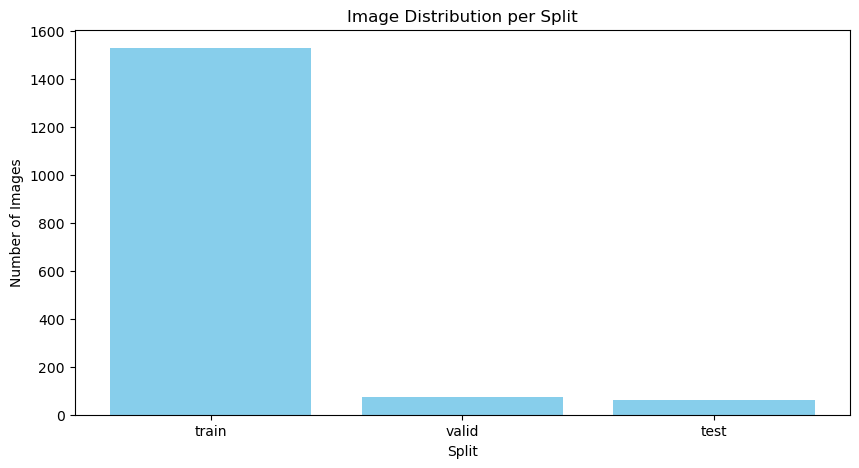

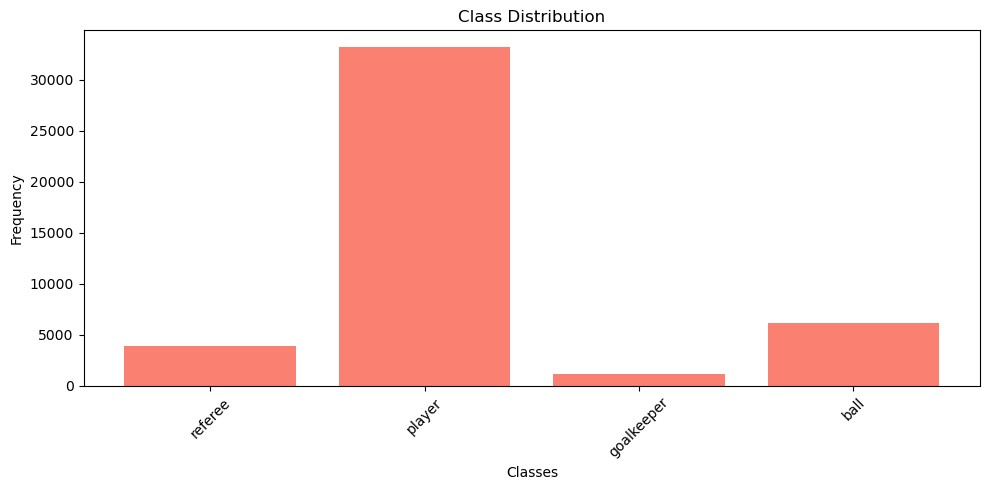

In [6]:
plot_dataset(dataset_path)

In [15]:
model.train(data=os.path.join(dataset_path, "data.yaml"), epochs=50, imgsz=640, save=True, project="yolo_football_analysis", name="yolo9c_dataset_v2")
wandb.finish()

New https://pypi.org/project/ultralytics/8.3.80 available  Update with 'pip install -U ultralytics'
engine\trainer: task=detect, mode=train, model=yolov9c.pt, data=c:\Users\siani\PycharmProjects\AIxFootballAnalysis\src\training\../../dataset\yolov9\v2\data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=yolo_football_analysis, name=yolo9c_dataset_v2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show

wandb: Currently logged in as: sianiemanuele (sianiemanuele_07) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed 


train: Scanning C:\Users\siani\PycharmProjects\AIxFootballAnalysis\dataset\yolov9\v2\train\labels...:   0%|          | 0/1530 [00:00<?, ?it/s]Scanning C:\Users\siani\PycharmProjects\AIxFootballAnalysis\dataset\yolov9\v2\train\labels... 47 images, 0 backgrounds, 0 corrupt:   3%|▎         | 47/1530 [00:00<00:03, 460.86it/s]Scanning C:\Users\siani\PycharmProjects\AIxFootballAnalysis\dataset\yolov9\v2\train\labels... 103 images, 0 backgrounds, 0 corrupt:   7%|▋         | 103/1530 [00:00<00:02, 513.89it/s]Scanning C:\Users\siani\PycharmProjects\AIxFootballAnalysis\dataset\yolov9\v2\train\labels... 156 images, 0 backgrounds, 0 corrupt:  10%|█         | 156/1530 [00:00<00:02, 520.84it/s]Scanning C:\Users\siani\PycharmProjects\AIxFootballAnalysis\dataset\yolov9\v2\train\labels... 209 images, 0 backgrounds, 0 corrupt:  14%|█▎        | 209/1530 [00:00<00:02, 520.50it/s]Scanning C:\Users\siani\PycharmProjects\AIxFootballAnalysis\dataset\yolov9\v2\train\labels... 262 images, 0 backgrounds, 0 corru

train: New cache created: C:\Users\siani\PycharmProjects\AIxFootballAnalysis\dataset\yolov9\v2\train\labels.cache


val: Scanning C:\Users\siani\PycharmProjects\AIxFootballAnalysis\dataset\yolov9\v2\valid\labels...:   0%|          | 0/75 [00:00<?, ?it/s]Scanning C:\Users\siani\PycharmProjects\AIxFootballAnalysis\dataset\yolov9\v2\valid\labels... 24 images, 0 backgrounds, 0 corrupt:  32%|███▏      | 24/75 [00:00<00:00, 220.87it/s]Scanning C:\Users\siani\PycharmProjects\AIxFootballAnalysis\dataset\yolov9\v2\valid\labels... 59 images, 0 backgrounds, 0 corrupt:  79%|███████▊  | 59/75 [00:00<00:00, 275.24it/s]Scanning C:\Users\siani\PycharmProjects\AIxFootballAnalysis\dataset\yolov9\v2\valid\labels... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<00:00, 269.26it/s]


val: New cache created: C:\Users\siani\PycharmProjects\AIxFootballAnalysis\dataset\yolov9\v2\valid\labels.cache
Plotting labels to yolo_football_analysis\yolo9c_dataset_v2\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.0005), 160 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to yolo_football_analysis\yolo9c_dataset_v2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      11.4G      1.216      1.091     0.8212        451        640: 100%|██████████| 96/96 [21:38<00:00, 13.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.72s/it]


                   all         75       1796      0.754      0.611      0.673      0.423

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      11.2G      1.278     0.6399      0.818        432        640: 100%|██████████| 96/96 [21:57<00:00, 13.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<00:00,  4.47s/it]


                   all         75       1796      0.771      0.662      0.695      0.407

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      11.2G      1.247     0.5951      0.814        491        640: 100%|██████████| 96/96 [18:56<00:00, 11.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<00:00,  5.02s/it]


                   all         75       1796      0.801      0.686      0.709        0.4

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      11.2G      1.214     0.5786     0.8116        629        640: 100%|██████████| 96/96 [21:45<00:00, 13.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.91s/it]


                   all         75       1796      0.846      0.709      0.735      0.433

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      11.2G       1.18     0.5629     0.8076        359        640: 100%|██████████| 96/96 [21:17<00:00, 13.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  5.00s/it]


                   all         75       1796        0.8      0.689      0.726      0.453

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      11.3G      1.139     0.5318     0.8049        580        640: 100%|██████████| 96/96 [20:32<00:00, 12.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.74s/it]


                   all         75       1796      0.818      0.716      0.753      0.462

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      11.2G       1.09     0.5095     0.8019        478        640: 100%|██████████| 96/96 [20:23<00:00, 12.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<00:00,  4.65s/it]


                   all         75       1796      0.798      0.707       0.74      0.457

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      11.2G      1.077     0.5012     0.7997        491        640: 100%|██████████| 96/96 [23:36<00:00, 14.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<00:00,  5.29s/it]


                   all         75       1796      0.788      0.675       0.73      0.461

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      11.2G      1.063     0.5034     0.8005        427        640: 100%|██████████| 96/96 [20:05<00:00, 12.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<00:00,  4.66s/it]


                   all         75       1796      0.763      0.745      0.769      0.487

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      11.2G       1.04     0.4774     0.7986        366        640: 100%|██████████| 96/96 [21:42<00:00, 13.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<00:00,  5.12s/it]


                   all         75       1796      0.837       0.72      0.771      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      11.3G      1.022     0.4681     0.7974        466        640: 100%|██████████| 96/96 [22:09<00:00, 13.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.84s/it]


                   all         75       1796      0.821      0.745      0.788      0.505

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      11.2G       1.04     0.4752     0.7979        429        640: 100%|██████████| 96/96 [20:47<00:00, 13.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<00:00,  5.25s/it]


                   all         75       1796      0.826      0.714      0.746      0.473

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      11.2G      1.023     0.4682     0.7971        415        640: 100%|██████████| 96/96 [19:50<00:00, 12.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<00:00,  5.31s/it]


                   all         75       1796      0.915      0.674      0.753      0.486

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      11.2G      1.043     0.4647     0.7979        413        640: 100%|██████████| 96/96 [20:40<00:00, 12.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.98s/it]


                   all         75       1796      0.852      0.739      0.791      0.513

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      11.2G     0.9705     0.4401      0.793        431        640: 100%|██████████| 96/96 [19:39<00:00, 12.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.92s/it]


                   all         75       1796      0.805      0.767      0.786      0.523

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      11.3G     0.9982     0.4614     0.7957        470        640: 100%|██████████| 96/96 [19:44<00:00, 12.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<00:00,  4.38s/it]


                   all         75       1796       0.93      0.728      0.775      0.506

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      11.2G     0.9979     0.4523      0.796        551        640: 100%|██████████| 96/96 [22:09<00:00, 13.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.88s/it]


                   all         75       1796       0.85      0.735      0.773      0.501

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      11.2G     0.9546     0.4394     0.7933        512        640: 100%|██████████| 96/96 [20:00<00:00, 12.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.89s/it]


                   all         75       1796      0.847      0.751      0.778      0.522

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      11.2G     0.9704     0.4383     0.7933        507        640: 100%|██████████| 96/96 [18:00<00:00, 11.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.87s/it]


                   all         75       1796      0.899      0.728      0.786      0.507

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      11.2G     0.9656     0.4366     0.7922        478        640: 100%|██████████| 96/96 [21:49<00:00, 13.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.93s/it]


                   all         75       1796      0.816      0.739      0.785      0.516

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      11.2G     0.9302     0.4239     0.7911        563        640: 100%|██████████| 96/96 [19:26<00:00, 12.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.70s/it]


                   all         75       1796      0.809      0.741      0.786      0.526

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      11.3G     0.9427     0.4258     0.7903        462        640: 100%|██████████| 96/96 [17:47<00:00, 11.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<00:00,  4.55s/it]


                   all         75       1796      0.802       0.73      0.774      0.513

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      11.2G     0.9435     0.4257     0.7892        538        640: 100%|██████████| 96/96 [19:24<00:00, 12.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:12<00:00,  4.24s/it]


                   all         75       1796      0.884      0.719      0.779      0.507

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      11.2G     0.9157     0.4094     0.7902        458        640: 100%|██████████| 96/96 [19:33<00:00, 12.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<00:00,  5.08s/it]


                   all         75       1796      0.815      0.741      0.778      0.523

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      11.2G      0.903     0.4055     0.7873        442        640: 100%|██████████| 96/96 [21:15<00:00, 13.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<00:00,  5.00s/it]


                   all         75       1796      0.849      0.752       0.79      0.537

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      11.2G     0.8943     0.4045     0.7868        364        640: 100%|██████████| 96/96 [19:43<00:00, 12.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<00:00,  4.50s/it]


                   all         75       1796      0.842       0.74      0.798      0.531

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      11.2G     0.9095     0.4093     0.7886        528        640: 100%|██████████| 96/96 [19:40<00:00, 12.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<00:00,  4.55s/it]


                   all         75       1796      0.862      0.734      0.781      0.529

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      11.2G     0.8816      0.398     0.7857        530        640: 100%|██████████| 96/96 [20:34<00:00, 12.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<00:00,  4.63s/it]


                   all         75       1796      0.793        0.7      0.771      0.529

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      11.2G     0.9077     0.4034     0.7872        368        640: 100%|██████████| 96/96 [18:17<00:00, 11.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<00:00,  4.53s/it]


                   all         75       1796      0.886      0.726       0.78      0.525

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      11.2G     0.8576      0.383      0.784        456        640: 100%|██████████| 96/96 [20:24<00:00, 12.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.96s/it]


                   all         75       1796      0.827      0.758      0.782      0.541

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      11.2G     0.8617     0.3898     0.7849        413        640: 100%|██████████| 96/96 [20:39<00:00, 12.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<00:00,  5.01s/it]


                   all         75       1796      0.846      0.767      0.788      0.539

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      11.2G     0.8515     0.3809     0.7838        576        640: 100%|██████████| 96/96 [20:16<00:00, 12.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.70s/it]


                   all         75       1796      0.878      0.763      0.807      0.555

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      11.2G     0.8447     0.3806     0.7849        368        640: 100%|██████████| 96/96 [21:14<00:00, 13.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:12<00:00,  4.30s/it]


                   all         75       1796      0.819      0.773      0.787      0.546

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      11.2G     0.8488     0.3812     0.7853        470        640: 100%|██████████| 96/96 [21:35<00:00, 13.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<00:00,  4.65s/it]


                   all         75       1796      0.883      0.747      0.808      0.546

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      11.2G     0.8403     0.3724     0.7843        402        640: 100%|██████████| 96/96 [19:52<00:00, 12.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:12<00:00,  4.02s/it]


                   all         75       1796      0.865      0.754      0.798      0.555

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      11.2G     0.8265     0.3696     0.7824        567        640: 100%|██████████| 96/96 [21:08<00:00, 13.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.70s/it]


                   all         75       1796      0.832      0.744      0.783      0.545

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      11.3G     0.8279     0.3717     0.7846        459        640: 100%|██████████| 96/96 [20:52<00:00, 13.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:11<00:00,  3.74s/it]


                   all         75       1796      0.807      0.769      0.782      0.542

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      11.1G     0.8047     0.3621     0.7807        450        640: 100%|██████████| 96/96 [22:23<00:00, 14.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:12<00:00,  4.31s/it]


                   all         75       1796      0.869      0.771      0.807      0.558

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      11.2G     0.8058      0.359     0.7819        448        640: 100%|██████████| 96/96 [21:00<00:00, 13.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.80s/it]


                   all         75       1796      0.864      0.745      0.791      0.543

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      11.2G     0.7875     0.3533     0.7803        445        640: 100%|██████████| 96/96 [19:49<00:00, 12.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<00:00,  5.03s/it]


                   all         75       1796      0.877      0.754      0.807      0.556
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      11.2G     0.7641     0.3535     0.7816        245        640: 100%|██████████| 96/96 [19:29<00:00, 12.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.82s/it]


                   all         75       1796      0.814      0.758      0.793      0.536

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      11.2G     0.7482     0.3454     0.7798        259        640: 100%|██████████| 96/96 [19:28<00:00, 12.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<00:00,  4.62s/it]


                   all         75       1796      0.843      0.739      0.793      0.546

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      11.2G     0.7265     0.3365     0.7808        254        640: 100%|██████████| 96/96 [21:36<00:00, 13.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:12<00:00,  4.11s/it]


                   all         75       1796      0.889      0.737      0.804      0.551

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      11.2G     0.7301     0.3367     0.7805        243        640: 100%|██████████| 96/96 [21:44<00:00, 13.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:11<00:00,  3.80s/it]


                   all         75       1796      0.854      0.744      0.803      0.552

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      11.2G     0.7227     0.3325     0.7789        251        640: 100%|██████████| 96/96 [19:51<00:00, 12.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<00:00,  4.41s/it]


                   all         75       1796      0.828      0.755      0.792      0.557

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      11.2G      0.707     0.3248     0.7779        255        640: 100%|██████████| 96/96 [18:26<00:00, 11.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:12<00:00,  4.22s/it]


                   all         75       1796      0.888       0.73      0.791      0.544

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      11.2G     0.6948     0.3212     0.7785        250        640: 100%|██████████| 96/96 [18:44<00:00, 11.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:11<00:00,  3.98s/it]


                   all         75       1796      0.843      0.751        0.8      0.554

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      11.2G     0.6868     0.3172      0.778        255        640: 100%|██████████| 96/96 [20:18<00:00, 12.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:12<00:00,  4.18s/it]


                   all         75       1796      0.838      0.754      0.801      0.567

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      11.2G     0.6713     0.3113     0.7776        254        640: 100%|██████████| 96/96 [19:42<00:00, 12.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:11<00:00,  3.85s/it]


                   all         75       1796      0.819      0.748      0.798      0.561

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      11.2G     0.6662     0.3083     0.7757        252        640: 100%|██████████| 96/96 [19:26<00:00, 12.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:12<00:00,  4.30s/it]


                   all         75       1796      0.856      0.754      0.803       0.56

50 epochs completed in 17.245 hours.
Optimizer stripped from yolo_football_analysis\yolo9c_dataset_v2\weights\last.pt, 51.6MB
Optimizer stripped from yolo_football_analysis\yolo9c_dataset_v2\weights\best.pt, 51.6MB

Validating yolo_football_analysis\yolo9c_dataset_v2\weights\best.pt...
Ultralytics 8.3.28  Python-3.10.0 torch-2.5.0 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
YOLOv9c summary (fused): 384 layers, 25,322,332 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.47it/s]


                   all         75       1796      0.838      0.754      0.801      0.568
                  ball         73         73      0.589      0.247      0.308      0.136
            goalkeeper         50         50      0.843       0.86      0.927      0.669
                player         75       1493      0.968      0.963      0.992      0.768
               referee         75        180      0.952      0.944      0.977        0.7
Speed: 0.6ms preprocess, 14.0ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to yolo_football_analysis\yolo9c_dataset_v2


wandb: Network error (ConnectionError), entering retry loop.
wandb: Network error (ConnectionError), entering retry loop.
wandb: Network error (ConnectionError), entering retry loop.
wandb: Network error (ConnectionError), entering retry loop.
wandb: Network error (ConnectionError), entering retry loop.


lr/pg0,▃▆███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁
lr/pg1,▃████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg2,▃▆███▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
metrics/mAP50(B),▁▂▃▄▄▄▆▆▇▅▇▇▆▆▆▇▇▆▇▆█▇▆▇▇▇█▇▇▇▇█▇▇█▇▇███
metrics/mAP50-95(B),▂▁▁▂▃▃▄▅▅▄▆▆▅▅▆▆▆▆▅▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇█▇▇██
metrics/precision(B),▁▂▃▅▃▃▂▁▄▄▇▅▃█▅▇▃▃▆▃▅▅▃▆▄▆▄▆▅▄▆▅▆▃▅▄▆▅▄▄
metrics/recall(B),▁▃▄▅▄▅▄▇▆▇▄▇█▆▆▆▇▇▆▆▇▇▆▅▇██▇▇█▇▇▇▇▆▇▆▇▇▇
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,▇██▇▇▆▆▆▅▅▅▅▅▄▄▄▄▄▄▄▄▃▄▃▃▃▃▃▃▃▃▂▂▂▂▂▁▁▁▁


### Plots

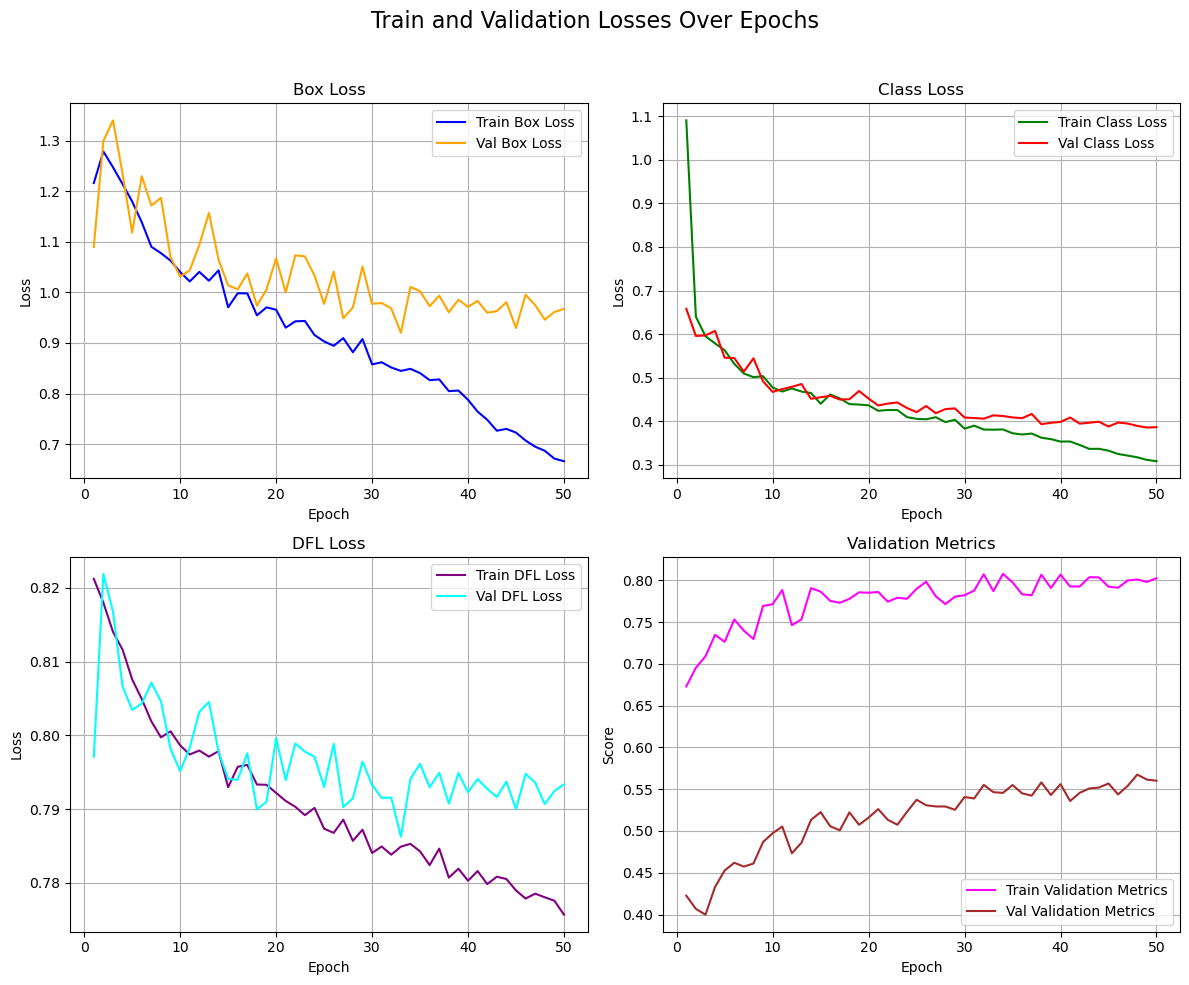

In [17]:
results_path = os.path.join(cwd, "yolo_football_analysis", "yolo9c_dataset_v2", "results.csv")
data = pd.read_csv(results_path)
plot_losses(data)

# Training with higher image resolution 

## No Augmentation

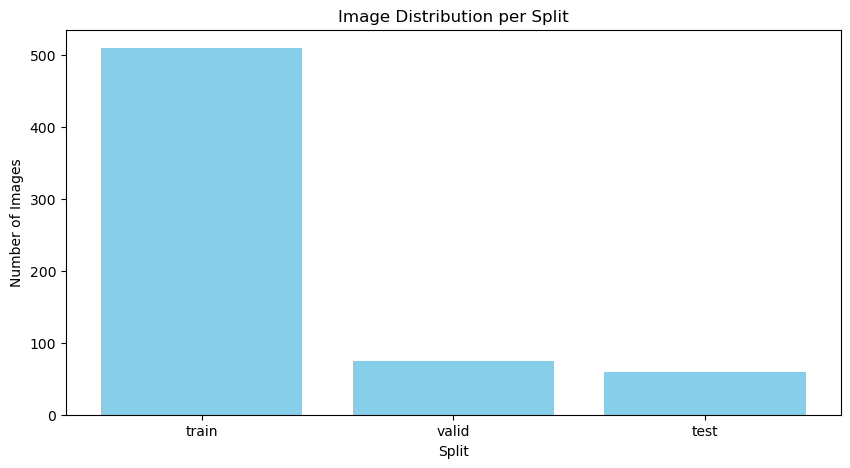

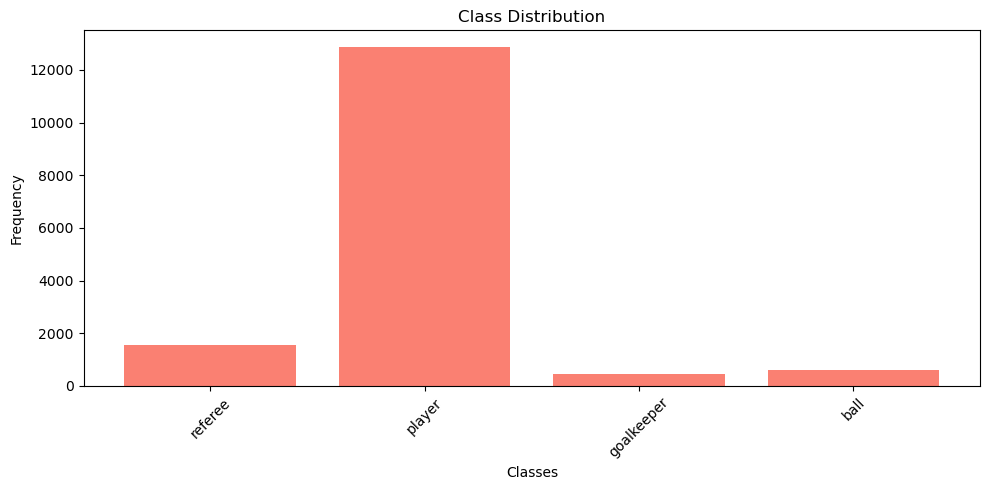

In [2]:
mp.freeze_support()  # Necessario su Windows
model = YOLO("yolov9c.pt")
model = model.cuda()
dataset_path = os.path.join(dataset_root_folder, "yolov9", "v0")
plot_dataset(dataset_path)

In [4]:
model.train(data=os.path.join(dataset_path, "data.yaml"), epochs=50, imgsz=1280, save=True, project="yolo_football_analysis", 
            name="yolo9c_dataset_v0_high_res", batch=4)

New https://pypi.org/project/ultralytics/8.3.82 available  Update with 'pip install -U ultralytics'
engine\trainer: task=detect, mode=train, model=yolov9c.pt, data=c:\Users\siani\PycharmProjects\AIxFootballAnalysis\src\training\../../dataset\yolov9\v0\data.yaml, epochs=50, time=None, patience=100, batch=4, imgsz=1280, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=yolo_football_analysis, name=yolo9c_dataset_v0_high_res3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=

wandb: Currently logged in as: sianiemanuele (sianiemanuele_07) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed 


train: Scanning C:\Users\siani\PycharmProjects\AIxFootballAnalysis\dataset\yolov9\v0\train\labels.cache... 510 images, 0 backgrounds, 0 corrupt: 100%|██████████| 510/510 [00:00<?, ?it/s]Scanning C:\Users\siani\PycharmProjects\AIxFootballAnalysis\dataset\yolov9\v0\train\labels.cache... 510 images, 0 backgrounds, 0 corrupt: 100%|██████████| 510/510 [00:00<?, ?it/s]
val: Scanning C:\Users\siani\PycharmProjects\AIxFootballAnalysis\dataset\yolov9\v0\valid\labels.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]Scanning C:\Users\siani\PycharmProjects\AIxFootballAnalysis\dataset\yolov9\v0\valid\labels.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]


Plotting labels to yolo_football_analysis\yolo9c_dataset_v0_high_res3\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.0005), 160 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 1280 train, 1280 val
Using 8 dataloader workers
Logging results to yolo_football_analysis\yolo9c_dataset_v0_high_res3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      11.3G     0.9391      1.016     0.8589         47       1280: 100%|██████████| 128/128 [31:56<00:00, 14.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:50<00:00,  5.10s/it]


                   all         75       1796      0.379      0.758      0.391      0.268

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      11.1G     0.9737     0.6044     0.8676         76       1280: 100%|██████████| 128/128 [26:22<00:00, 12.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:46<00:00,  4.68s/it]


                   all         75       1796      0.858      0.798      0.858      0.549

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      11.2G     0.9397     0.6588     0.8619         43       1280: 100%|██████████| 128/128 [26:17<00:00, 12.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:58<00:00,  5.81s/it]


                   all         75       1796      0.661      0.628       0.63      0.406

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      11.3G     0.9826      0.595     0.8648         88       1280: 100%|██████████| 128/128 [28:08<00:00, 13.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:54<00:00,  5.42s/it]


                   all         75       1796      0.901      0.822      0.858      0.556

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      11.3G     0.9885     0.5499     0.8649         87       1280: 100%|██████████| 128/128 [24:34<00:00, 11.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:48<00:00,  4.87s/it]


                   all         75       1796      0.791      0.862      0.885      0.576

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      11.3G     0.9031     0.4864     0.8566         98       1280: 100%|██████████| 128/128 [22:50<00:00, 10.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:46<00:00,  4.63s/it]


                   all         75       1796      0.937      0.833      0.879      0.549

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      11.1G     0.9229        0.5      0.862         51       1280: 100%|██████████| 128/128 [23:44<00:00, 11.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:38<00:00,  3.84s/it]


                   all         75       1796      0.913       0.83      0.873       0.59

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      11.2G     0.9174     0.4972     0.8519        103       1280: 100%|██████████| 128/128 [26:17<00:00, 12.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:39<00:00,  3.93s/it]


                   all         75       1796      0.901      0.832       0.88       0.59

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      11.3G     0.8798     0.4692     0.8505         65       1280: 100%|██████████| 128/128 [24:26<00:00, 11.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:45<00:00,  4.56s/it]


                   all         75       1796      0.926      0.836      0.888      0.561

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      11.3G     0.8863     0.4673     0.8395         96       1280: 100%|██████████| 128/128 [23:04<00:00, 10.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:46<00:00,  4.66s/it]


                   all         75       1796      0.931      0.836      0.882      0.574

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      11.2G     0.8966     0.4589     0.8482         69       1280: 100%|██████████| 128/128 [25:24<00:00, 11.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:49<00:00,  4.97s/it]


                   all         75       1796      0.879      0.852      0.878      0.585

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      11.2G     0.8284     0.4264     0.8361        114       1280: 100%|██████████| 128/128 [23:43<00:00, 11.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:52<00:00,  5.26s/it]


                   all         75       1796      0.913      0.855      0.878      0.592

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      11.2G     0.8532     0.4296     0.8372         91       1280: 100%|██████████| 128/128 [23:26<00:00, 10.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:47<00:00,  4.73s/it]


                   all         75       1796      0.934      0.838      0.887      0.594

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      11.2G     0.8318     0.4196     0.8375         97       1280: 100%|██████████| 128/128 [25:53<00:00, 12.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:57<00:00,  5.76s/it]


                   all         75       1796      0.921       0.84      0.886       0.58

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      11.3G     0.8481     0.4225     0.8382         34       1280: 100%|██████████| 128/128 [27:29<00:00, 12.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:58<00:00,  5.82s/it]


                   all         75       1796       0.92      0.868      0.898      0.611

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      11.3G      0.818     0.4099     0.8339        107       1280: 100%|██████████| 128/128 [24:11<00:00, 11.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:46<00:00,  4.64s/it]


                   all         75       1796      0.933      0.865      0.893      0.607

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      11.3G      0.818     0.4032     0.8307        116       1280: 100%|██████████| 128/128 [23:32<00:00, 11.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:45<00:00,  4.57s/it]


                   all         75       1796      0.873      0.867      0.885      0.607

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      11.3G     0.7915     0.3914     0.8331        129       1280: 100%|██████████| 128/128 [25:36<00:00, 12.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:52<00:00,  5.26s/it]


                   all         75       1796      0.936      0.846      0.891      0.607

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      11.1G      0.787     0.3877     0.8349         34       1280: 100%|██████████| 128/128 [27:11<00:00, 12.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:47<00:00,  4.72s/it]


                   all         75       1796      0.894      0.872      0.902      0.617

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      11.2G     0.8048     0.3916     0.8292         44       1280: 100%|██████████| 128/128 [23:03<00:00, 10.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:46<00:00,  4.61s/it]


                   all         75       1796      0.936      0.856      0.893       0.61

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      11.2G     0.7769     0.3794     0.8268         83       1280: 100%|██████████| 128/128 [24:16<00:00, 11.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:44<00:00,  4.43s/it]


                   all         75       1796      0.889      0.882      0.896      0.614

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      11.2G     0.8031     0.3863     0.8279         98       1280: 100%|██████████| 128/128 [25:10<00:00, 11.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:44<00:00,  4.43s/it]


                   all         75       1796      0.922      0.874      0.892      0.608

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      11.2G     0.7759      0.373      0.825         30       1280: 100%|██████████| 128/128 [24:28<00:00, 11.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:47<00:00,  4.72s/it]


                   all         75       1796      0.921      0.877      0.904       0.63

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      11.3G     0.7754     0.3681     0.8241         60       1280: 100%|██████████| 128/128 [26:25<00:00, 12.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:51<00:00,  5.12s/it]


                   all         75       1796      0.933      0.871      0.905      0.627

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      11.1G     0.7628     0.3672     0.8238         87       1280: 100%|██████████| 128/128 [27:48<00:00, 13.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:45<00:00,  4.55s/it]


                   all         75       1796      0.891      0.877      0.897      0.631

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      11.1G      0.776     0.3677     0.8276         57       1280: 100%|██████████| 128/128 [27:47<00:00, 13.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:50<00:00,  5.04s/it]


                   all         75       1796      0.888      0.884      0.895      0.624

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      11.2G     0.7354     0.3488     0.8222         68       1280: 100%|██████████| 128/128 [27:24<00:00, 12.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:58<00:00,  5.86s/it]


                   all         75       1796      0.883      0.867      0.893      0.626

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      11.2G     0.7472     0.3565     0.8258         71       1280: 100%|██████████| 128/128 [27:11<00:00, 12.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:54<00:00,  5.43s/it]


                   all         75       1796      0.916      0.872      0.895      0.609

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      11.2G     0.7404     0.3568     0.8215         75       1280: 100%|██████████| 128/128 [25:30<00:00, 11.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:45<00:00,  4.51s/it]


                   all         75       1796      0.902      0.869      0.896      0.624

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      11.1G     0.7683     0.3618     0.8234         59       1280: 100%|██████████| 128/128 [28:08<00:00, 13.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:51<00:00,  5.11s/it]


                   all         75       1796      0.908      0.842      0.881      0.618

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      11.3G     0.7609     0.3545     0.8213         72       1280: 100%|██████████| 128/128 [28:11<00:00, 13.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:47<00:00,  4.76s/it]


                   all         75       1796      0.893      0.861      0.892      0.622

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      11.3G     0.7385     0.3442     0.8232         55       1280: 100%|██████████| 128/128 [25:35<00:00, 12.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:51<00:00,  5.17s/it]


                   all         75       1796      0.908      0.893      0.909      0.636

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      11.2G     0.7424     0.3467     0.8209         60       1280: 100%|██████████| 128/128 [25:25<00:00, 11.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:41<00:00,  4.19s/it]


                   all         75       1796      0.884      0.875      0.893      0.625

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      11.3G     0.7375     0.3461     0.8203         53       1280: 100%|██████████| 128/128 [27:18<00:00, 12.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:44<00:00,  4.41s/it]


                   all         75       1796      0.936      0.866      0.906      0.629

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      11.3G     0.7142     0.3364     0.8171        101       1280: 100%|██████████| 128/128 [26:44<00:00, 12.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:49<00:00,  4.97s/it]


                   all         75       1796      0.906       0.89      0.903      0.629

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      11.2G     0.7102     0.3374     0.8162         55       1280: 100%|██████████| 128/128 [26:46<00:00, 12.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:44<00:00,  4.49s/it]


                   all         75       1796      0.926      0.881      0.903      0.637

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      11.3G     0.7016     0.3342     0.8165        143       1280: 100%|██████████| 128/128 [23:42<00:00, 11.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:47<00:00,  4.73s/it]


                   all         75       1796      0.925      0.829      0.878      0.623

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      11.2G     0.6969     0.3287     0.8129         42       1280: 100%|██████████| 128/128 [24:54<00:00, 11.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:47<00:00,  4.74s/it]


                   all         75       1796      0.898       0.88      0.905      0.625

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      11.3G     0.6925     0.3249     0.8128         87       1280: 100%|██████████| 128/128 [25:43<00:00, 12.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:45<00:00,  4.55s/it]


                   all         75       1796      0.933      0.874      0.912      0.644

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      11.3G     0.6852      0.321     0.8114        178       1280: 100%|██████████| 128/128 [26:03<00:00, 12.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:44<00:00,  4.45s/it]


                   all         75       1796      0.931      0.868      0.899      0.628
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      11.1G     0.6805     0.3204     0.8153         48       1280: 100%|██████████| 128/128 [25:34<00:00, 11.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:46<00:00,  4.67s/it]


                   all         75       1796      0.896      0.887      0.896      0.626

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      11.1G     0.6737     0.3131     0.8173         46       1280: 100%|██████████| 128/128 [24:45<00:00, 11.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:46<00:00,  4.68s/it]


                   all         75       1796      0.926      0.858      0.884       0.62

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      6.18G     0.6725     0.3169     0.8138         49       1280: 100%|██████████| 128/128 [24:19<00:00, 11.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:09<00:00,  1.02it/s]


                   all         75       1796      0.878      0.859      0.862      0.609

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      11.1G     0.6761     0.3134     0.8138         46       1280: 100%|██████████| 128/128 [28:57<00:00, 13.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:42<00:00,  4.22s/it]


                   all         75       1796      0.929      0.884      0.906      0.632

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      11.1G     0.6685     0.3041     0.8181         44       1280: 100%|██████████| 128/128 [29:18<00:00, 13.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:43<00:00,  4.31s/it]


                   all         75       1796      0.936      0.886      0.902      0.623

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      6.19G     0.6584     0.2998     0.8131         48       1280: 100%|██████████| 128/128 [26:59<00:00, 12.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:15<00:00,  1.50s/it]


                   all         75       1796      0.935      0.855      0.896      0.626

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      6.12G     0.6446     0.2935     0.8096         46       1280: 100%|██████████| 128/128 [24:00<00:00, 11.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:20<00:00,  2.03s/it]


                   all         75       1796       0.93      0.862      0.901      0.634

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      11.1G     0.6457     0.2909       0.81         48       1280: 100%|██████████| 128/128 [25:30<00:00, 11.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:38<00:00,  3.83s/it]


                   all         75       1796      0.888      0.889      0.905      0.632

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      11.1G     0.6314     0.2851     0.8098         49       1280: 100%|██████████| 128/128 [26:40<00:00, 12.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:47<00:00,  4.76s/it]


                   all         75       1796      0.893      0.883      0.895      0.628

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      11.1G      0.625     0.2807     0.8085         47       1280: 100%|██████████| 128/128 [24:35<00:00, 11.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:47<00:00,  4.72s/it]


                   all         75       1796      0.927      0.876      0.911      0.642

50 epochs completed in 22.221 hours.
Optimizer stripped from yolo_football_analysis\yolo9c_dataset_v0_high_res3\weights\last.pt, 51.7MB
Optimizer stripped from yolo_football_analysis\yolo9c_dataset_v0_high_res3\weights\best.pt, 51.7MB

Validating yolo_football_analysis\yolo9c_dataset_v0_high_res3\weights\best.pt...
Ultralytics 8.3.28  Python-3.10.0 torch-2.5.0 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
YOLOv9c summary (fused): 384 layers, 25,322,332 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:26<00:00,  2.65s/it]


                   all         75       1796      0.932      0.871      0.911      0.642
                  ball         73         73       0.92      0.589      0.753      0.362
            goalkeeper         50         50      0.849        0.9      0.904      0.666
                player         75       1493      0.984      0.996      0.994      0.805
               referee         75        180      0.975          1      0.993      0.736
Speed: 1.5ms preprocess, 339.4ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to yolo_football_analysis\yolo9c_dataset_v0_high_res3


lr/pg0,▃▆███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▁▁▁
lr/pg1,▃████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▁▁
lr/pg2,▃████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▁▁▁
metrics/mAP50(B),▁▇▄▇█▇████████████████████████████▇█████
metrics/mAP50-95(B),▁▆▄▆▇▇▇▆▇▇▇▇▇▇▇▇▇▇▇███▇███████████▇█████
metrics/precision(B),▁▇▅█▆████▇██▇█▇▇███▇▇███▇▇██████▇█▇███▇█
metrics/recall(B),▄▁▆▇▆▆▆▆▇▇▇▇▇▇▇▇█▇█▇█▇▇▇▇██▇███▇▇█▇██▇▇▇
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,▇█▇██▇▇▆▆▆▅▅▅▅▅▄▄▄▄▄▄▄▃▃▃▄▃▃▃▃▂▂▂▂▂▂▂▂▁▁


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001CB48E39660>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
       

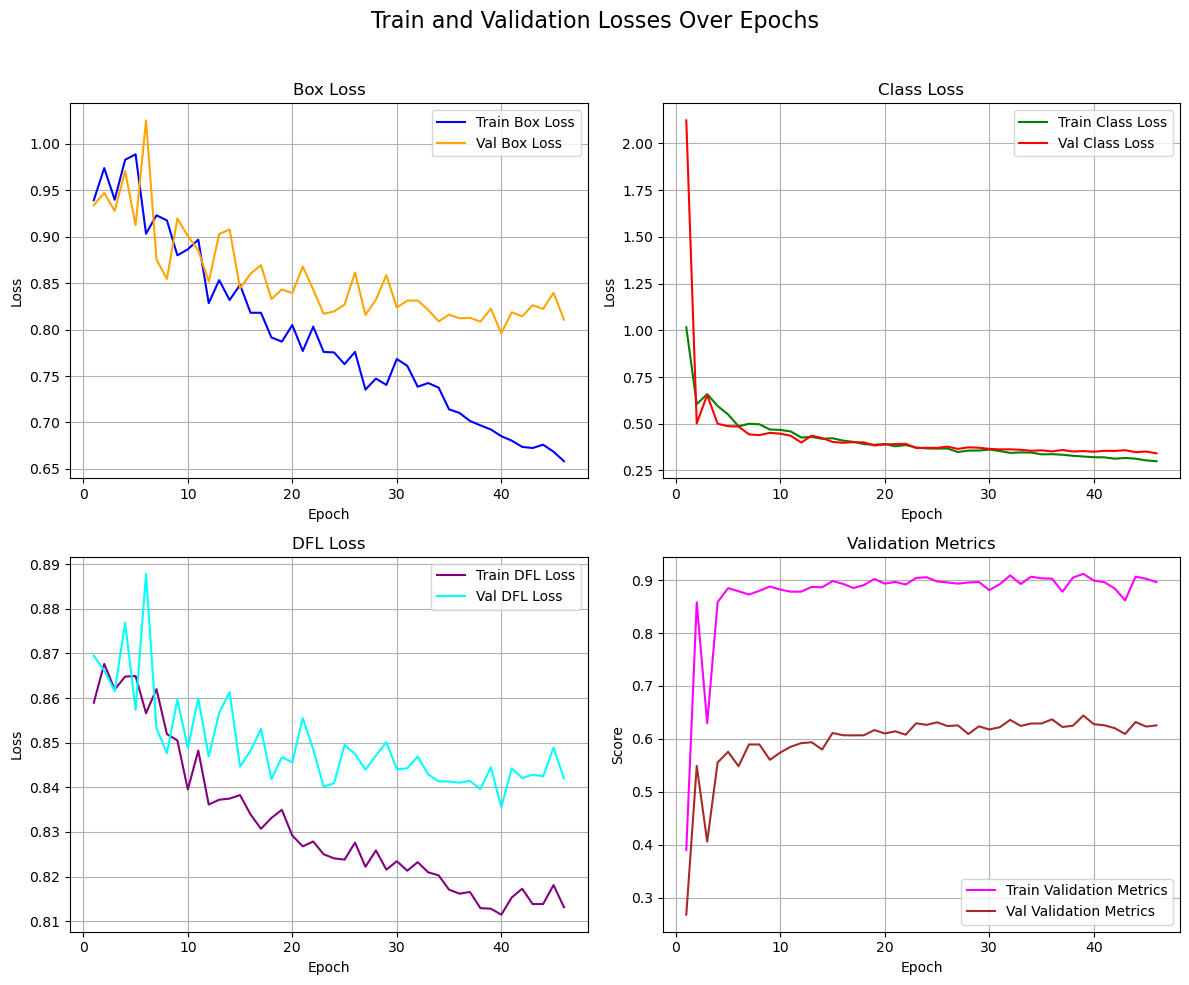

In [5]:
wandb.finish()
### Plots
results_path = os.path.join(cwd, "yolo_football_analysis", "yolo9c_dataset_v0_high_res", "results.csv")
data = pd.read_csv(results_path)
plot_losses(data)

## Bbox copy-paste augmentation

In [3]:
mp.freeze_support()  # Necessario su Windows
model = YOLO("yolov9c.pt")
model = model.cuda()

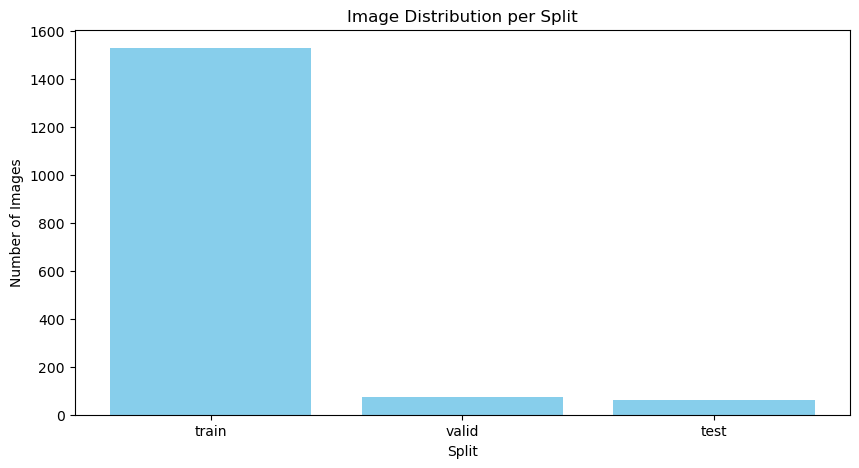

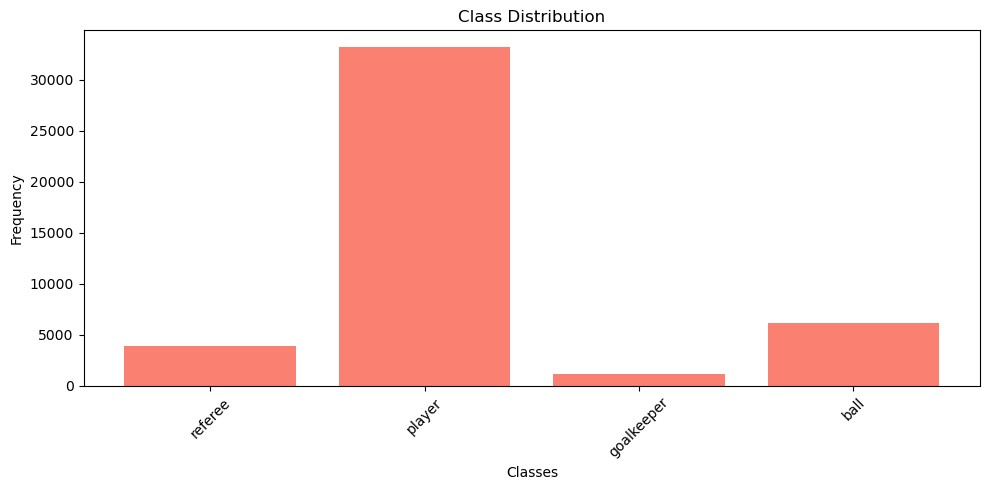

In [7]:
dataset_path = os.path.join(dataset_root_folder, "yolov9", "v2")
plot_dataset(dataset_path)

In [5]:
model.train(data=os.path.join(dataset_path, "data.yaml"), epochs=50, imgsz=1280, save=True, project="yolo_football_analysis", 
            name="yolo9c_dataset_v2_high_res", batch=4)
wandb.finish()

New https://pypi.org/project/ultralytics/8.3.84 available  Update with 'pip install -U ultralytics'
engine\trainer: task=detect, mode=train, model=yolov9c.pt, data=c:\Users\siani\PycharmProjects\AIxFootballAnalysis\src\training\../../dataset\yolov9\v2\data.yaml, epochs=50, time=None, patience=100, batch=4, imgsz=1280, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=yolo_football_analysis, name=yolo9c_dataset_v2_high_res2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=

wandb: Currently logged in as: sianiemanuele (sianiemanuele_07) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed 


train: Scanning C:\Users\siani\PycharmProjects\AIxFootballAnalysis\dataset\yolov9\v2\train\labels.cache... 1530 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1530/1530 [00:00<?, ?it/s]Scanning C:\Users\siani\PycharmProjects\AIxFootballAnalysis\dataset\yolov9\v2\train\labels.cache... 1530 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1530/1530 [00:00<?, ?it/s]
val: Scanning C:\Users\siani\PycharmProjects\AIxFootballAnalysis\dataset\yolov9\v2\valid\labels.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]Scanning C:\Users\siani\PycharmProjects\AIxFootballAnalysis\dataset\yolov9\v2\valid\labels.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]


Plotting labels to yolo_football_analysis\yolo9c_dataset_v2_high_res2\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.0005), 160 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 1280 train, 1280 val
Using 8 dataloader workers
Logging results to yolo_football_analysis\yolo9c_dataset_v2_high_res2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      11.4G     0.9075     0.7299     0.8503        131       1280: 100%|██████████| 383/383 [1:29:03<00:00, 13.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:46<00:00,  4.61s/it]


                   all         75       1796      0.856      0.794      0.839      0.562

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      11.2G     0.9054     0.4848     0.8476        121       1280: 100%|██████████| 383/383 [1:22:34<00:00, 12.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:52<00:00,  5.23s/it]


                   all         75       1796      0.911      0.808       0.87      0.571

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      11.1G     0.9534     0.5194     0.8554         65       1280: 100%|██████████| 383/383 [1:20:07<00:00, 12.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:39<00:00,  3.97s/it]


                   all         75       1796      0.897      0.831      0.871      0.563

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      11.1G     0.8851     0.4794     0.8434         87       1280: 100%|██████████| 383/383 [1:24:50<00:00, 13.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:39<00:00,  3.96s/it]


                   all         75       1796      0.892      0.828      0.861      0.555

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      11.3G     0.8918      0.449     0.8412        121       1280: 100%|██████████| 383/383 [1:16:01<00:00, 11.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:45<00:00,  4.50s/it]


                   all         75       1796      0.903      0.842      0.873      0.591

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      11.3G     0.8539     0.4239     0.8378        122       1280: 100%|██████████| 383/383 [1:12:48<00:00, 11.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:49<00:00,  4.94s/it]


                   all         75       1796      0.942      0.811      0.862      0.587

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      11.1G     0.8202     0.4056     0.8298         91       1280: 100%|██████████| 383/383 [1:17:11<00:00, 12.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:47<00:00,  4.73s/it]


                   all         75       1796      0.913      0.821      0.868      0.599

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      11.1G     0.8142     0.3957     0.8287        111       1280: 100%|██████████| 383/383 [1:19:18<00:00, 12.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:46<00:00,  4.61s/it]


                   all         75       1796      0.924      0.841      0.881      0.604

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      11.1G     0.7903     0.3827     0.8258         74       1280: 100%|██████████| 383/383 [1:22:41<00:00, 12.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:45<00:00,  4.51s/it]


                   all         75       1796      0.935      0.813      0.881      0.596

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      11.3G     0.8285     0.4035     0.8318        104       1280: 100%|██████████| 383/383 [1:16:18<00:00, 11.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:47<00:00,  4.79s/it]


                   all         75       1796      0.909      0.859      0.886      0.605

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      11.2G     0.7837     0.3786     0.8251         75       1280: 100%|██████████| 383/383 [1:23:15<00:00, 13.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:51<00:00,  5.12s/it]


                   all         75       1796      0.866      0.867      0.887      0.607

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      11.2G      0.774     0.3723     0.8232        179       1280: 100%|██████████| 383/383 [1:23:40<00:00, 13.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:41<00:00,  4.12s/it]


                   all         75       1796      0.899      0.854      0.885      0.604

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      11.1G       0.77      0.371     0.8225        106       1280: 100%|██████████| 383/383 [1:16:06<00:00, 11.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:42<00:00,  4.29s/it]


                   all         75       1796        0.9      0.878      0.897      0.627

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      11.2G     0.7649     0.3631     0.8213         97       1280: 100%|██████████| 383/383 [1:27:16<00:00, 13.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:49<00:00,  4.99s/it]


                   all         75       1796      0.898      0.862      0.885      0.607

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      11.2G     0.7598     0.3611     0.8213         58       1280: 100%|██████████| 383/383 [1:20:34<00:00, 12.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:45<00:00,  4.60s/it]


                   all         75       1796      0.958      0.829      0.898       0.63

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      11.2G     0.7339     0.3455     0.8168         48       1280: 100%|██████████| 383/383 [1:16:42<00:00, 12.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:44<00:00,  4.45s/it]


                   all         75       1796      0.898      0.885      0.902       0.62

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      11.2G     0.7402     0.3491     0.8186         96       1280: 100%|██████████| 383/383 [1:11:33<00:00, 11.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:43<00:00,  4.32s/it]


                   all         75       1796      0.937      0.861      0.896       0.62

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      11.1G      0.736     0.3492     0.8182         45       1280: 100%|██████████| 383/383 [1:17:04<00:00, 12.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:46<00:00,  4.66s/it]


                   all         75       1796      0.928      0.884      0.913      0.638

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      11.3G      0.721     0.3393      0.816        159       1280: 100%|██████████| 383/383 [1:16:39<00:00, 12.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:45<00:00,  4.51s/it]


                   all         75       1796       0.93      0.859      0.898      0.621

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      11.2G     0.7275     0.3392     0.8151         50       1280: 100%|██████████| 383/383 [1:09:28<00:00, 10.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:45<00:00,  4.51s/it]


                   all         75       1796      0.872      0.851      0.893      0.617

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      11.2G     0.7126     0.3365     0.8141        138       1280: 100%|██████████| 383/383 [1:17:10<00:00, 12.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:52<00:00,  5.24s/it]


                   all         75       1796       0.88      0.863      0.888       0.62

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      11.2G     0.7137     0.3371     0.8136         58       1280: 100%|██████████| 383/383 [1:07:56<00:00, 10.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:43<00:00,  4.36s/it]


                   all         75       1796      0.911      0.875      0.905      0.621

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      11.2G     0.7047     0.3324     0.8113         53       1280: 100%|██████████| 383/383 [1:25:48<00:00, 13.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:51<00:00,  5.16s/it]


                   all         75       1796      0.887      0.861      0.899       0.63

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      11.2G     0.6972     0.3319     0.8118        170       1280: 100%|██████████| 383/383 [1:11:04<00:00, 11.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:41<00:00,  4.18s/it]


                   all         75       1796      0.905      0.877      0.901      0.623

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      11.3G     0.6877     0.3218     0.8088         86       1280: 100%|██████████| 383/383 [1:21:30<00:00, 12.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:47<00:00,  4.79s/it]


                   all         75       1796      0.931      0.863      0.905       0.64

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      11.2G     0.6848     0.3212     0.8084         54       1280: 100%|██████████| 383/383 [1:17:35<00:00, 12.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:57<00:00,  5.79s/it]


                   all         75       1796      0.941      0.858       0.91      0.618

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      11.2G       0.68     0.3219     0.8073        107       1280: 100%|██████████| 383/383 [1:13:19<00:00, 11.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:49<00:00,  4.98s/it]


                   all         75       1796      0.889      0.882      0.905      0.643

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      11.3G     0.6628     0.3144     0.8068         94       1280: 100%|██████████| 383/383 [1:23:38<00:00, 13.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:53<00:00,  5.33s/it]


                   all         75       1796      0.922      0.873      0.907      0.636

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      11.3G     0.6595     0.3107     0.8048         71       1280: 100%|██████████| 383/383 [1:12:28<00:00, 11.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:42<00:00,  4.28s/it]


                   all         75       1796      0.895      0.888      0.912       0.64

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      11.2G     0.6422     0.3013     0.8023        111       1280: 100%|██████████| 383/383 [1:19:29<00:00, 12.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:52<00:00,  5.22s/it]


                   all         75       1796      0.923      0.885      0.908      0.641

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      11.2G     0.6489     0.3023     0.8028         99       1280: 100%|██████████| 383/383 [1:26:02<00:00, 13.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:56<00:00,  5.63s/it]


                   all         75       1796      0.927      0.871       0.91      0.641

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      11.1G     0.6375     0.3014      0.802         39       1280: 100%|██████████| 383/383 [1:27:53<00:00, 13.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:46<00:00,  4.64s/it]


                   all         75       1796      0.909      0.866      0.896       0.63

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      11.2G     0.6273     0.2983     0.8008         79       1280: 100%|██████████| 383/383 [1:18:15<00:00, 12.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:41<00:00,  4.17s/it]


                   all         75       1796      0.914      0.897      0.913      0.641

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      11.2G     0.6311     0.2967     0.8005         94       1280: 100%|██████████| 383/383 [1:29:19<00:00, 13.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:46<00:00,  4.67s/it]


                   all         75       1796      0.923      0.884      0.921      0.653

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      11.2G     0.6255     0.2927     0.7996        153       1280: 100%|██████████| 383/383 [1:20:16<00:00, 12.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:48<00:00,  4.81s/it]


                   all         75       1796      0.928      0.874      0.913      0.652

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      11.3G     0.5988      0.282     0.7964         75       1280: 100%|██████████| 383/383 [1:10:10<00:00, 10.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:54<00:00,  5.44s/it]


                   all         75       1796      0.902      0.883      0.913      0.646

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      11.1G     0.5963     0.2836     0.7979         59       1280: 100%|██████████| 383/383 [1:17:34<00:00, 12.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:43<00:00,  4.38s/it]


                   all         75       1796      0.952      0.876      0.923      0.646

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      11.2G     0.5928     0.2791     0.7946         84       1280: 100%|██████████| 383/383 [1:21:34<00:00, 12.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:44<00:00,  4.47s/it]


                   all         75       1796      0.952      0.869      0.909      0.649

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      11.2G     0.5789      0.273     0.7935        148       1280: 100%|██████████| 383/383 [1:17:20<00:00, 12.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:43<00:00,  4.34s/it]


                   all         75       1796       0.94      0.875      0.909      0.642

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      11.2G     0.5668     0.2659     0.7926         58       1280: 100%|██████████| 383/383 [1:15:20<00:00, 11.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:43<00:00,  4.32s/it]


                   all         75       1796      0.919      0.877      0.912      0.646
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      10.8G     0.5609     0.2652      0.795         47       1280: 100%|██████████| 383/383 [1:24:49<00:00, 13.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:47<00:00,  4.79s/it]


                   all         75       1796      0.901      0.894      0.904      0.625

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      10.8G     0.5521     0.2641     0.7926         51       1280: 100%|██████████| 383/383 [1:22:49<00:00, 12.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:46<00:00,  4.60s/it]


                   all         75       1796      0.966      0.856      0.911      0.651

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      10.8G     0.5443      0.259     0.7939         53       1280: 100%|██████████| 383/383 [1:24:46<00:00, 13.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:50<00:00,  5.05s/it]


                   all         75       1796      0.942      0.875      0.914      0.637

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      10.8G       0.53      0.252     0.7907         54       1280: 100%|██████████| 383/383 [1:52:19<00:00, 17.60s/it]  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:45<00:00,  4.54s/it]


                   all         75       1796       0.93      0.888      0.917      0.638

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      10.8G     0.5194     0.2474     0.7889         50       1280: 100%|██████████| 383/383 [1:24:48<00:00, 13.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:37<00:00,  3.80s/it]


                   all         75       1796      0.942      0.868       0.91      0.635

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      10.8G     0.5125     0.2452      0.788         50       1280: 100%|██████████| 383/383 [1:31:59<00:00, 14.41s/it]  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:47<00:00,  4.74s/it]


                   all         75       1796      0.951      0.869      0.918      0.652

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      10.8G     0.5001     0.2404     0.7881         47       1280: 100%|██████████| 383/383 [1:24:15<00:00, 13.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:42<00:00,  4.30s/it]


                   all         75       1796      0.949      0.875      0.909      0.646

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      10.8G     0.4871     0.2341      0.785         46       1280: 100%|██████████| 383/383 [1:32:48<00:00, 14.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:38<00:00,  3.89s/it]


                   all         75       1796      0.927      0.868      0.898       0.64

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      10.8G       0.48     0.2297     0.7848         52       1280: 100%|██████████| 383/383 [4:19:11<00:00, 40.60s/it]     
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:38<00:00,  3.84s/it]


                   all         75       1796      0.924      0.884       0.91      0.647

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      6.12G     0.4752      0.227     0.7846         45       1280: 100%|██████████| 383/383 [1:22:35<00:00, 12.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:34<00:00,  3.45s/it]


                   all         75       1796      0.905      0.896      0.906      0.641

50 epochs completed in 70.975 hours.
Optimizer stripped from yolo_football_analysis\yolo9c_dataset_v2_high_res2\weights\last.pt, 51.7MB
Optimizer stripped from yolo_football_analysis\yolo9c_dataset_v2_high_res2\weights\best.pt, 51.7MB

Validating yolo_football_analysis\yolo9c_dataset_v2_high_res2\weights\best.pt...
Ultralytics 8.3.28  Python-3.10.0 torch-2.5.0 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
YOLOv9c summary (fused): 384 layers, 25,322,332 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.53it/s]


                   all         75       1796      0.923      0.884      0.921      0.653
                  ball         73         73       0.86      0.644      0.741      0.335
            goalkeeper         50         50      0.868       0.92      0.957      0.735
                player         75       1493      0.991      0.994      0.993      0.806
               referee         75        180      0.972       0.98      0.993      0.735
Speed: 1.9ms preprocess, 73.2ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to yolo_football_analysis\yolo9c_dataset_v2_high_res2


lr/pg0,▃▆███▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▁▁▁
lr/pg1,▃▆███▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▁▁▁
lr/pg2,▃▆███▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
metrics/mAP50(B),▁▄▄▃▄▃▄▅▅▅▆▅▆▆▇▅▅▆▆▆▇▆▇▇▇▇█▇▇█▇▇▆▇▇▇█▇▆█
metrics/mAP50-95(B),▁▂▂▁▄▄▄▄▅▅▆▆▆▇▆▆▆▆▆▇▇▇▇▇▇▇███▇▇█▆█▇▇█▇▇█
metrics/precision(B),▁▅▄▃▄▅▅▆▄▂▄▄▇▄▆▆▂▃▃▄▆▃▅▄▅▄▅▅▆▄▇▆▄█▆▆▇▇▆▅
metrics/recall(B),▁▂▄▃▄▂▅▆▅▇▃▇▆▇▅▆▇▆▇▆▇▆▇▇▆█▇▆▇▇▇▇█▅▆▆▆▇▆▇
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,▇▇█▇▇▆▆▆▆▆▅▅▅▅▅▅▅▄▄▄▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▁▁▁


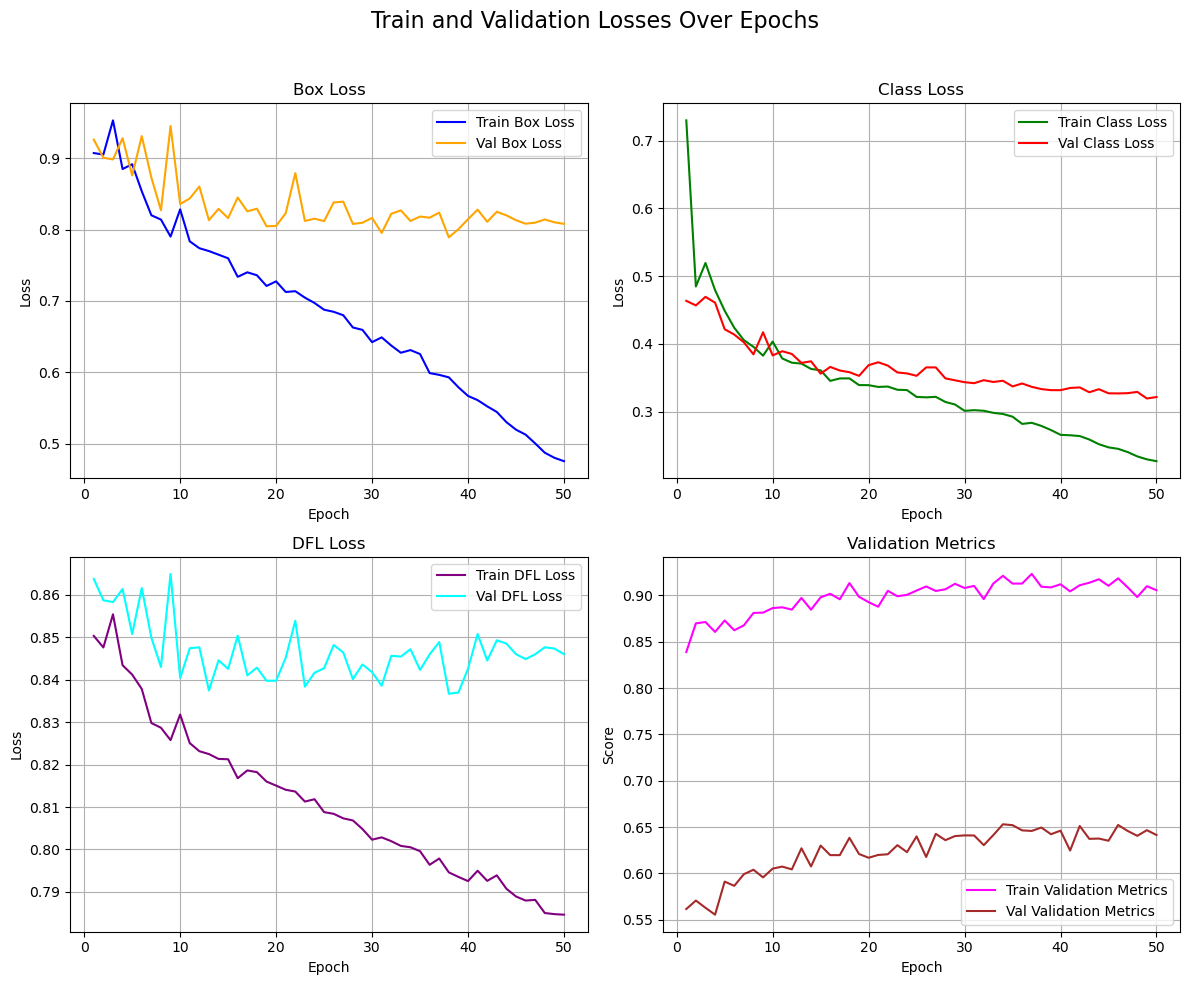

In [7]:
### Plots
results_path = os.path.join(cwd, "yolo_football_analysis", "yolo9c_dataset_v2_high_res2", "results.csv")
data = pd.read_csv(results_path)
plot_losses(data)

# SR Yolo

In [2]:
mp.freeze_support()  # Necessario su Windows
model = SRYOLO(
        yolo_weights="yolov9c.pt",
        scale=4,
        model_path=r'..\models\esrgan\experiments\finetune_Realesr-general-x4v3_2\models\net_g_latest.pth',
        dni_weight=0.5,
        tile=0,
        tile_pad=10,
        pre_pad=0,
        max_size=1280
    )
model = model.cuda()


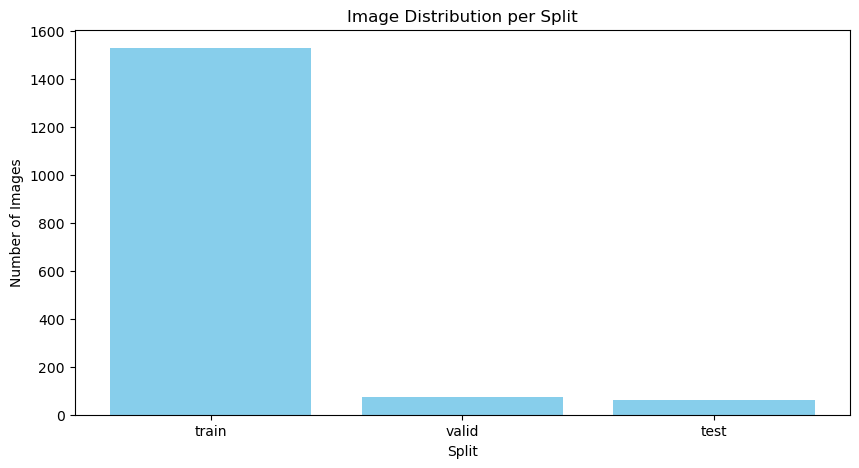

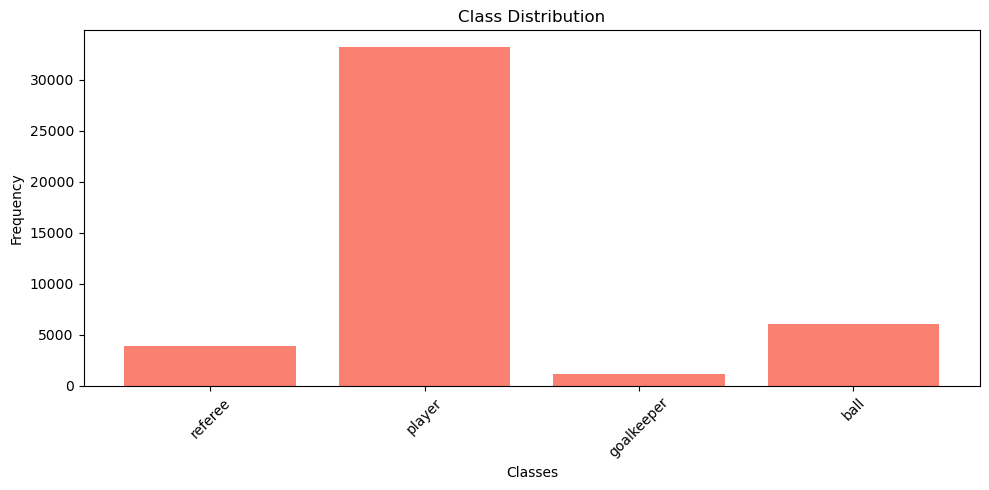

In [3]:
dataset_path = os.path.join(dataset_root_folder, "yolov9", "v3")
plot_dataset(dataset_path)

In [4]:
model.train(data=os.path.join(dataset_path, "data.yaml"), epochs=50, imgsz=1280, save=True, project="yolo_football_analysis", 
            name="yoloSR_dataset_v3_high_res", batch=4)
wandb.finish()

New https://pypi.org/project/ultralytics/8.3.146 available  Update with 'pip install -U ultralytics'
engine\trainer: task=detect, mode=train, model=yolov9c.pt, data=c:\Users\siani\PycharmProjects\AIxFootballAnalysis\src\training\../../dataset\yolov9\v3\data.yaml, epochs=50, time=None, patience=100, batch=4, imgsz=1280, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=yolo_football_analysis, name=yoloSR_dataset_v3_high_res, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=

wandb: Currently logged in as: sianiemanuele (sianiemanuele_07) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed 


train: Scanning C:\Users\siani\PycharmProjects\AIxFootballAnalysis\dataset\yolov9\v3\train\labels...:   0%|          | 0/1530 [00:00<?, ?it/s]Scanning C:\Users\siani\PycharmProjects\AIxFootballAnalysis\dataset\yolov9\v3\train\labels... 39 images, 0 backgrounds, 0 corrupt:   3%|▎         | 39/1530 [00:00<00:03, 388.32it/s]Scanning C:\Users\siani\PycharmProjects\AIxFootballAnalysis\dataset\yolov9\v3\train\labels... 84 images, 0 backgrounds, 0 corrupt:   5%|▌         | 84/1530 [00:00<00:03, 419.73it/s]Scanning C:\Users\siani\PycharmProjects\AIxFootballAnalysis\dataset\yolov9\v3\train\labels... 131 images, 0 backgrounds, 0 corrupt:   9%|▊         | 131/1530 [00:00<00:03, 437.57it/s]Scanning C:\Users\siani\PycharmProjects\AIxFootballAnalysis\dataset\yolov9\v3\train\labels... 179 images, 0 backgrounds, 0 corrupt:  12%|█▏        | 179/1530 [00:00<00:03, 446.41it/s]Scanning C:\Users\siani\PycharmProjects\AIxFootballAnalysis\dataset\yolov9\v3\train\labels... 231 images, 0 backgrounds, 0 corrupt

train: New cache created: C:\Users\siani\PycharmProjects\AIxFootballAnalysis\dataset\yolov9\v3\train\labels.cache


val: Scanning C:\Users\siani\PycharmProjects\AIxFootballAnalysis\dataset\yolov9\v3\valid\labels...:   0%|          | 0/75 [00:00<?, ?it/s]Scanning C:\Users\siani\PycharmProjects\AIxFootballAnalysis\dataset\yolov9\v3\valid\labels... 27 images, 0 backgrounds, 0 corrupt:  36%|███▌      | 27/75 [00:00<00:00, 261.25it/s]Scanning C:\Users\siani\PycharmProjects\AIxFootballAnalysis\dataset\yolov9\v3\valid\labels... 60 images, 0 backgrounds, 0 corrupt:  80%|████████  | 60/75 [00:00<00:00, 300.15it/s]Scanning C:\Users\siani\PycharmProjects\AIxFootballAnalysis\dataset\yolov9\v3\valid\labels... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<00:00, 305.27it/s]


val: New cache created: C:\Users\siani\PycharmProjects\AIxFootballAnalysis\dataset\yolov9\v3\valid\labels.cache
Plotting labels to yolo_football_analysis\yoloSR_dataset_v3_high_res\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.0005), 160 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 1280 train, 1280 val
Using 8 dataloader workers
Logging results to yolo_football_analysis\yoloSR_dataset_v3_high_res
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      11.5G      3.181       3.97       2.13        135       1280: 100%|██████████| 383/383 [3:13:08<00:00, 30.26s/it]  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [01:38<00:00,  9.88s/it]


                   all         75       1796      0.241      0.283      0.312      0.147


wandb: Network error (ConnectionError), entering retry loop.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      11.2G       1.73      1.166      1.156        119       1280: 100%|██████████| 383/383 [1:16:29<00:00, 11.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:37<00:00,  3.71s/it]


                   all         75       1796      0.431        0.5      0.331      0.179

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      11.1G      1.516     0.9956      1.049         62       1280: 100%|██████████| 383/383 [1:26:51<00:00, 13.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:42<00:00,  4.20s/it]


                   all         75       1796      0.666      0.524      0.563      0.285

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      11.2G      1.432      0.886      1.007         86       1280: 100%|██████████| 383/383 [1:21:47<00:00, 12.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:51<00:00,  5.19s/it]


                   all         75       1796        0.7       0.58      0.599      0.324

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      11.3G      1.382     0.8368      0.985        122       1280: 100%|██████████| 383/383 [1:25:57<00:00, 13.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:44<00:00,  4.46s/it]


                   all         75       1796      0.672       0.67      0.611      0.358

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      11.3G      1.266     0.7377      0.953        116       1280: 100%|██████████| 383/383 [1:07:58<00:00, 10.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:39<00:00,  3.99s/it]


                   all         75       1796      0.787       0.71      0.745      0.457

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      11.1G      1.201     0.6811     0.9328         96       1280: 100%|██████████| 383/383 [1:12:11<00:00, 11.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:36<00:00,  3.69s/it]


                   all         75       1796       0.86      0.729      0.782       0.48

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      11.1G      1.154     0.6373     0.9224        113       1280: 100%|██████████| 383/383 [1:16:16<00:00, 11.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:42<00:00,  4.22s/it]


                   all         75       1796      0.794      0.741       0.79      0.469

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      11.1G      1.134     0.6146     0.9137         78       1280: 100%|██████████| 383/383 [1:13:09<00:00, 11.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:42<00:00,  4.27s/it]


                   all         75       1796      0.844      0.728      0.786      0.484

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      11.3G      1.105     0.5875     0.9103        103       1280: 100%|██████████| 383/383 [1:14:33<00:00, 11.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:46<00:00,  4.65s/it]


                   all         75       1796      0.844      0.794      0.821       0.52

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      11.2G      1.065     0.5563      0.898         81       1280: 100%|██████████| 383/383 [1:19:18<00:00, 12.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:43<00:00,  4.33s/it]


                   all         75       1796      0.915      0.758      0.814      0.518

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      11.2G      1.038     0.5554     0.8906        178       1280: 100%|██████████| 383/383 [1:14:15<00:00, 11.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:48<00:00,  4.83s/it]


                   all         75       1796      0.892      0.781      0.836      0.519

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      11.1G      1.027     0.5243      0.886        106       1280: 100%|██████████| 383/383 [1:13:04<00:00, 11.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:37<00:00,  3.76s/it]


                   all         75       1796      0.888        0.8      0.833      0.544

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      11.2G      1.031     0.5235     0.8872         94       1280: 100%|██████████| 383/383 [1:12:15<00:00, 11.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:41<00:00,  4.15s/it]


                   all         75       1796      0.857      0.807      0.843      0.545

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      11.2G     0.9942     0.5199     0.8806         58       1280: 100%|██████████| 383/383 [1:18:31<00:00, 12.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:43<00:00,  4.35s/it]


                   all         75       1796      0.881      0.785       0.82       0.51

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      11.2G     0.9649     0.4929     0.8733         47       1280: 100%|██████████| 383/383 [1:13:49<00:00, 11.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:38<00:00,  3.89s/it]


                   all         75       1796      0.892      0.811      0.846      0.561

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      11.3G     0.9823     0.4899      0.877         90       1280: 100%|██████████| 383/383 [1:15:44<00:00, 11.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:34<00:00,  3.41s/it]


                   all         75       1796       0.89      0.805      0.835      0.534

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      11.2G     0.9447     0.4746     0.8711         46       1280: 100%|██████████| 383/383 [1:20:07<00:00, 12.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:55<00:00,  5.56s/it]


                   all         75       1796      0.914      0.808      0.845      0.548

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      11.3G     0.9309     0.4715     0.8687        157       1280: 100%|██████████| 383/383 [1:30:01<00:00, 14.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:52<00:00,  5.25s/it]


                   all         75       1796      0.923      0.797      0.857      0.567

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      11.2G     0.9542     0.4652     0.8684         51       1280: 100%|██████████| 383/383 [1:14:20<00:00, 11.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:39<00:00,  3.98s/it]


                   all         75       1796      0.905      0.812       0.85      0.573

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      11.2G     0.9553     0.4653      0.868        140       1280: 100%|██████████| 383/383 [1:17:43<00:00, 12.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:49<00:00,  4.95s/it]


                   all         75       1796      0.884      0.815      0.846       0.55

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      11.2G     0.9075      0.456     0.8631         57       1280: 100%|██████████| 383/383 [1:19:39<00:00, 12.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:40<00:00,  4.00s/it]


                   all         75       1796      0.892      0.793      0.848      0.567

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      11.2G     0.8943     0.4438     0.8573         53       1280: 100%|██████████| 383/383 [1:30:41<00:00, 14.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:43<00:00,  4.39s/it]


                   all         75       1796      0.901      0.819       0.85      0.576

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      11.2G     0.8899     0.4401     0.8578        169       1280: 100%|██████████| 383/383 [1:16:08<00:00, 11.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:50<00:00,  5.00s/it]


                   all         75       1796      0.923      0.832      0.871      0.586

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      11.3G      0.862     0.4284     0.8514         83       1280: 100%|██████████| 383/383 [1:15:09<00:00, 11.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:45<00:00,  4.53s/it]


                   all         75       1796       0.92      0.839       0.88      0.588

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      11.2G      0.869     0.4305     0.8514         54       1280: 100%|██████████| 383/383 [1:17:04<00:00, 12.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:41<00:00,  4.17s/it]


                   all         75       1796       0.95      0.837      0.879      0.581

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      11.2G     0.8714     0.4278     0.8512        110       1280: 100%|██████████| 383/383 [1:10:10<00:00, 10.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:40<00:00,  4.08s/it]


                   all         75       1796      0.896      0.832      0.862      0.585

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      11.2G     0.8518     0.4249     0.8507         95       1280: 100%|██████████| 383/383 [1:19:23<00:00, 12.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:42<00:00,  4.23s/it]


                   all         75       1796      0.891      0.841      0.859      0.575

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      11.3G     0.8489     0.4201     0.8472         73       1280: 100%|██████████| 383/383 [1:18:18<00:00, 12.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:44<00:00,  4.48s/it]


                   all         75       1796       0.92      0.828      0.862      0.587

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      11.3G     0.8367     0.4119     0.8442        109       1280: 100%|██████████| 383/383 [1:08:53<00:00, 10.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:40<00:00,  4.09s/it]


                   all         75       1796      0.933      0.808      0.872      0.585

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      11.2G     0.8308     0.4059     0.8433         98       1280: 100%|██████████| 383/383 [1:18:48<00:00, 12.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:55<00:00,  5.52s/it]


                   all         75       1796      0.923      0.849      0.878      0.603

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      11.2G     0.8494     0.4097     0.8451         39       1280: 100%|██████████| 383/383 [1:12:25<00:00, 11.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:51<00:00,  5.13s/it]


                   all         75       1796       0.93      0.852      0.878      0.593

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      11.2G     0.7979      0.393     0.8387         76       1280: 100%|██████████| 383/383 [1:15:00<00:00, 11.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:42<00:00,  4.23s/it]


                   all         75       1796      0.922      0.853      0.883      0.597

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      11.2G     0.8174      0.396     0.8399         95       1280: 100%|██████████| 383/383 [1:24:23<00:00, 13.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:51<00:00,  5.20s/it]


                   all         75       1796       0.89      0.837      0.866      0.593

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      11.2G     0.8097     0.3881     0.8375        151       1280: 100%|██████████| 383/383 [1:21:57<00:00, 12.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:59<00:00,  5.98s/it]


                   all         75       1796      0.946      0.844       0.88      0.602

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      11.3G     0.7873     0.3817     0.8341         73       1280: 100%|██████████| 383/383 [1:21:09<00:00, 12.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:51<00:00,  5.13s/it]


                   all         75       1796      0.928      0.821      0.857      0.586

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      11.2G     0.7809     0.3804     0.8357         56       1280: 100%|██████████| 383/383 [1:20:47<00:00, 12.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:45<00:00,  4.59s/it]


                   all         75       1796      0.911      0.847      0.889      0.611

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      11.1G     0.7777     0.3797     0.8325         85       1280: 100%|██████████| 383/383 [1:34:43<00:00, 14.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:41<00:00,  4.19s/it]


                   all         75       1796      0.905      0.859      0.885      0.611

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      11.1G     0.7704     0.3747     0.8306        150       1280: 100%|██████████| 383/383 [1:14:59<00:00, 11.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:37<00:00,  3.73s/it]


                   all         75       1796      0.932      0.852      0.885      0.611

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      11.3G      0.759     0.3692       0.83         60       1280: 100%|██████████| 383/383 [1:10:34<00:00, 11.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:38<00:00,  3.83s/it]


                   all         75       1796      0.924      0.842      0.882      0.598
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      10.8G     0.7431     0.3659     0.8336         47       1280: 100%|██████████| 383/383 [1:27:38<00:00, 13.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:45<00:00,  4.58s/it]


                   all         75       1796        0.9      0.862      0.874        0.6

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      10.8G     0.7257     0.3598     0.8277         53       1280: 100%|██████████| 383/383 [1:27:27<00:00, 13.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:43<00:00,  4.32s/it]


                   all         75       1796      0.918      0.845      0.871      0.601

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      10.8G     0.7203     0.3552     0.8298         53       1280: 100%|██████████| 383/383 [1:25:46<00:00, 13.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:39<00:00,  3.92s/it]


                   all         75       1796      0.922      0.853      0.872      0.596

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      10.9G     0.7125     0.3502     0.8271         56       1280: 100%|██████████| 383/383 [1:24:25<00:00, 13.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:39<00:00,  3.99s/it]


                   all         75       1796      0.923      0.845      0.879      0.606

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      10.8G     0.7019     0.3451     0.8237         48       1280: 100%|██████████| 383/383 [1:24:13<00:00, 13.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:38<00:00,  3.86s/it]


                   all         75       1796      0.924      0.849      0.887      0.612

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      10.8G     0.6921     0.3401      0.822         52       1280: 100%|██████████| 383/383 [1:23:15<00:00, 13.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:41<00:00,  4.12s/it]


                   all         75       1796      0.925      0.852      0.882       0.61

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      10.8G     0.6821     0.3364     0.8213         47       1280: 100%|██████████| 383/383 [1:23:11<00:00, 13.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:49<00:00,  4.97s/it]


                   all         75       1796      0.936      0.843      0.878      0.605

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      10.8G     0.6732     0.3322     0.8197         46       1280: 100%|██████████| 383/383 [1:22:07<00:00, 12.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:38<00:00,  3.82s/it]


                   all         75       1796       0.94      0.847      0.884      0.613

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      10.8G     0.6668     0.3273     0.8184         50       1280: 100%|██████████| 383/383 [1:22:53<00:00, 12.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:37<00:00,  3.72s/it]


                   all         75       1796      0.945      0.857      0.887      0.615

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      6.16G     0.6629     0.3247     0.8171         45       1280: 100%|██████████| 383/383 [1:16:29<00:00, 11.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:33<00:00,  3.33s/it]


                   all         75       1796      0.931       0.84      0.881      0.614

50 epochs completed in 74.110 hours.
Optimizer stripped from yolo_football_analysis\yoloSR_dataset_v3_high_res\weights\last.pt, 51.7MB
Optimizer stripped from yolo_football_analysis\yoloSR_dataset_v3_high_res\weights\best.pt, 51.7MB

Validating yolo_football_analysis\yoloSR_dataset_v3_high_res\weights\best.pt...
Ultralytics 8.3.28  Python-3.10.0 torch-2.5.0 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
YOLOv9c summary (fused): 384 layers, 25,322,332 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.44it/s]


                   all         75       1796      0.945      0.857      0.887      0.616
                  ball         73         73      0.945      0.534      0.627      0.268
            goalkeeper         50         50      0.884      0.915      0.933      0.688
                player         75       1493      0.986      0.991      0.995      0.796
               referee         75        180      0.966      0.989      0.992      0.711
Speed: 2.0ms preprocess, 78.4ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to yolo_football_analysis\yoloSR_dataset_v3_high_res


lr/pg0,▃▆███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg1,▃▆███▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▁▁▁
lr/pg2,▃▆███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▁▁▁
metrics/mAP50(B),▁▁▄▄▅▇▇▇▇▇▇▇▇▇▇█▇███████████████████████
metrics/mAP50-95(B),▁▁▃▄▄▆▆▆▇▇▇▆▇▇▇▇▇▇▇█▇█▇█████████████████
metrics/precision(B),▁▃▅▆▅▇▆▇▇█▇▇▇▇██▇▇███▇▇████▇████████████
metrics/recall(B),▁▄▄▅▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇█████▇███████████████
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▄▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁


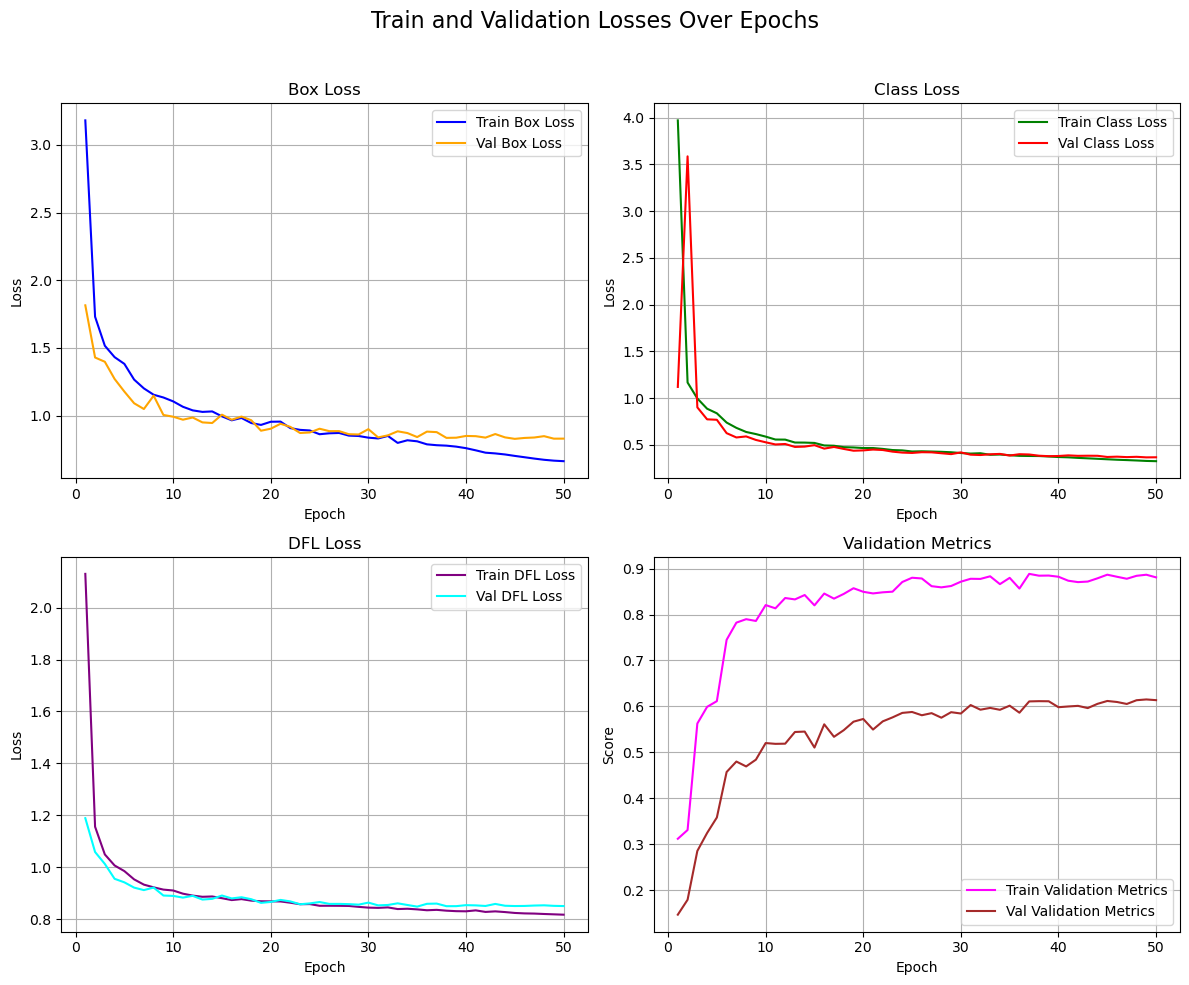

In [5]:
### Plots
results_path = os.path.join(cwd, "yolo_football_analysis", "yoloSR_dataset_v3_high_res", "results.csv")
data = pd.read_csv(results_path)
plot_losses(data)

# Custom Focal loss

In [ ]:
# use focal loss but with increased weight for the ball
mp.freeze_support()  # Necessario su Windows
model = YOLO("yolov9c.pt")
model = model.cuda()

dataset_path = os.path.join(dataset_root_folder, "yolov9", "v2")
plot_dataset(dataset_path)

model.train(data=os.path.join(dataset_path, "data.yaml"), epochs=50, imgsz=1280, save=True, project="yolo_football_analysis",
            name="yolo9c_dataset_v2_high_res_focal_loss", batch=4, fl_gamma=2)
